# SDMetrics

CTGAN을 실행하게 되면 이 재현자료가 얼마나 원자료와 유사하게 나왔는지를 알아보고싶을 것이다.   
옛날 CTGAN의 경우에는 평가방법이 없어 직접 공식을 이용하여서 패키지를 짜는 형식이었지만,   
최근에 SDMetrics에서 Single_Table의 경우와 Multi_Table의 경우를 나눠서 평가방법들을 소개해 놓았다.   
그래프나 단순척도로 표현할 수 있어 매우 좋은 패키지라 생각되어서 소개하는 글을 쓰게 되었다.   
싱글데이터의 범위 내에서 평가 방법을 정리한다. 

In [1]:
import requests
from io import BytesIO
from PIL import Image

## 1.  Quality Report 

-> 열 모양, 열 쌍 추세 및 테이블 관계를 보여준다.

열 모양의 경우에는 전체 데이터의 분포를 보여준다. 점수가 높을수록 실제자료와 재현자료와의 분포가 더 유사하다. 

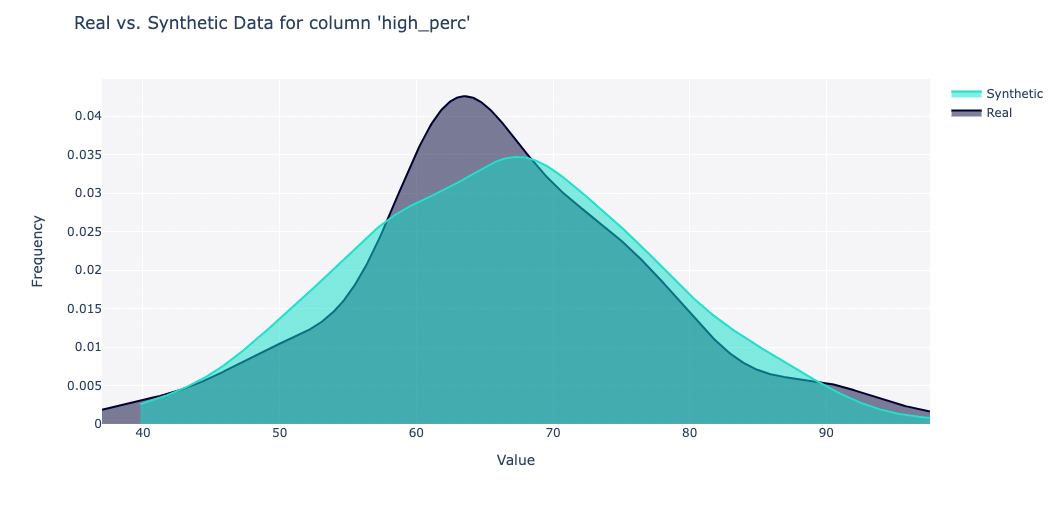

In [37]:
url1 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FSqv1M4pqnxbfGdlj1aWp%2FScreen%20Shot%202022-07-20%20at%206.46.46%20PM.png?alt=media&token=09ebc093-9926-43c5-a402-3af691b952e6"
res1 = requests.get(url1)
request_get_img1 = Image.open(BytesIO(res1.content))
request_get_img1

방법도 각 열의 종류가 무엇인가에 따라서 다른 평가방법을 보여준다. 

① Numerical , Datetime -> KSComplement

② Boolean , Categorical  -> TVComplement

### ● KSComplement

이 메트릭은 열 모양 ( 열의 한계 분포 또는 1D 히스토그램 ) 측면에서 실제자료의 열과 재현자료 열의 유사성을 계산한다.

 
1. Numerical : 이 메트릭은 연속적인 수치 데이터를 의미한다. 

2. Datetime : 이 메트릭은 날짜 시간의 값을 숫자 값으로 변환한다. 

※ 결측값은 무시함. 

점수는 0.0 ~ 1.0의 형태로 보여주고 1.0으로 갈수록 실제자료와 재현자료의 유사성이 높은것으로 판단하면 된다.

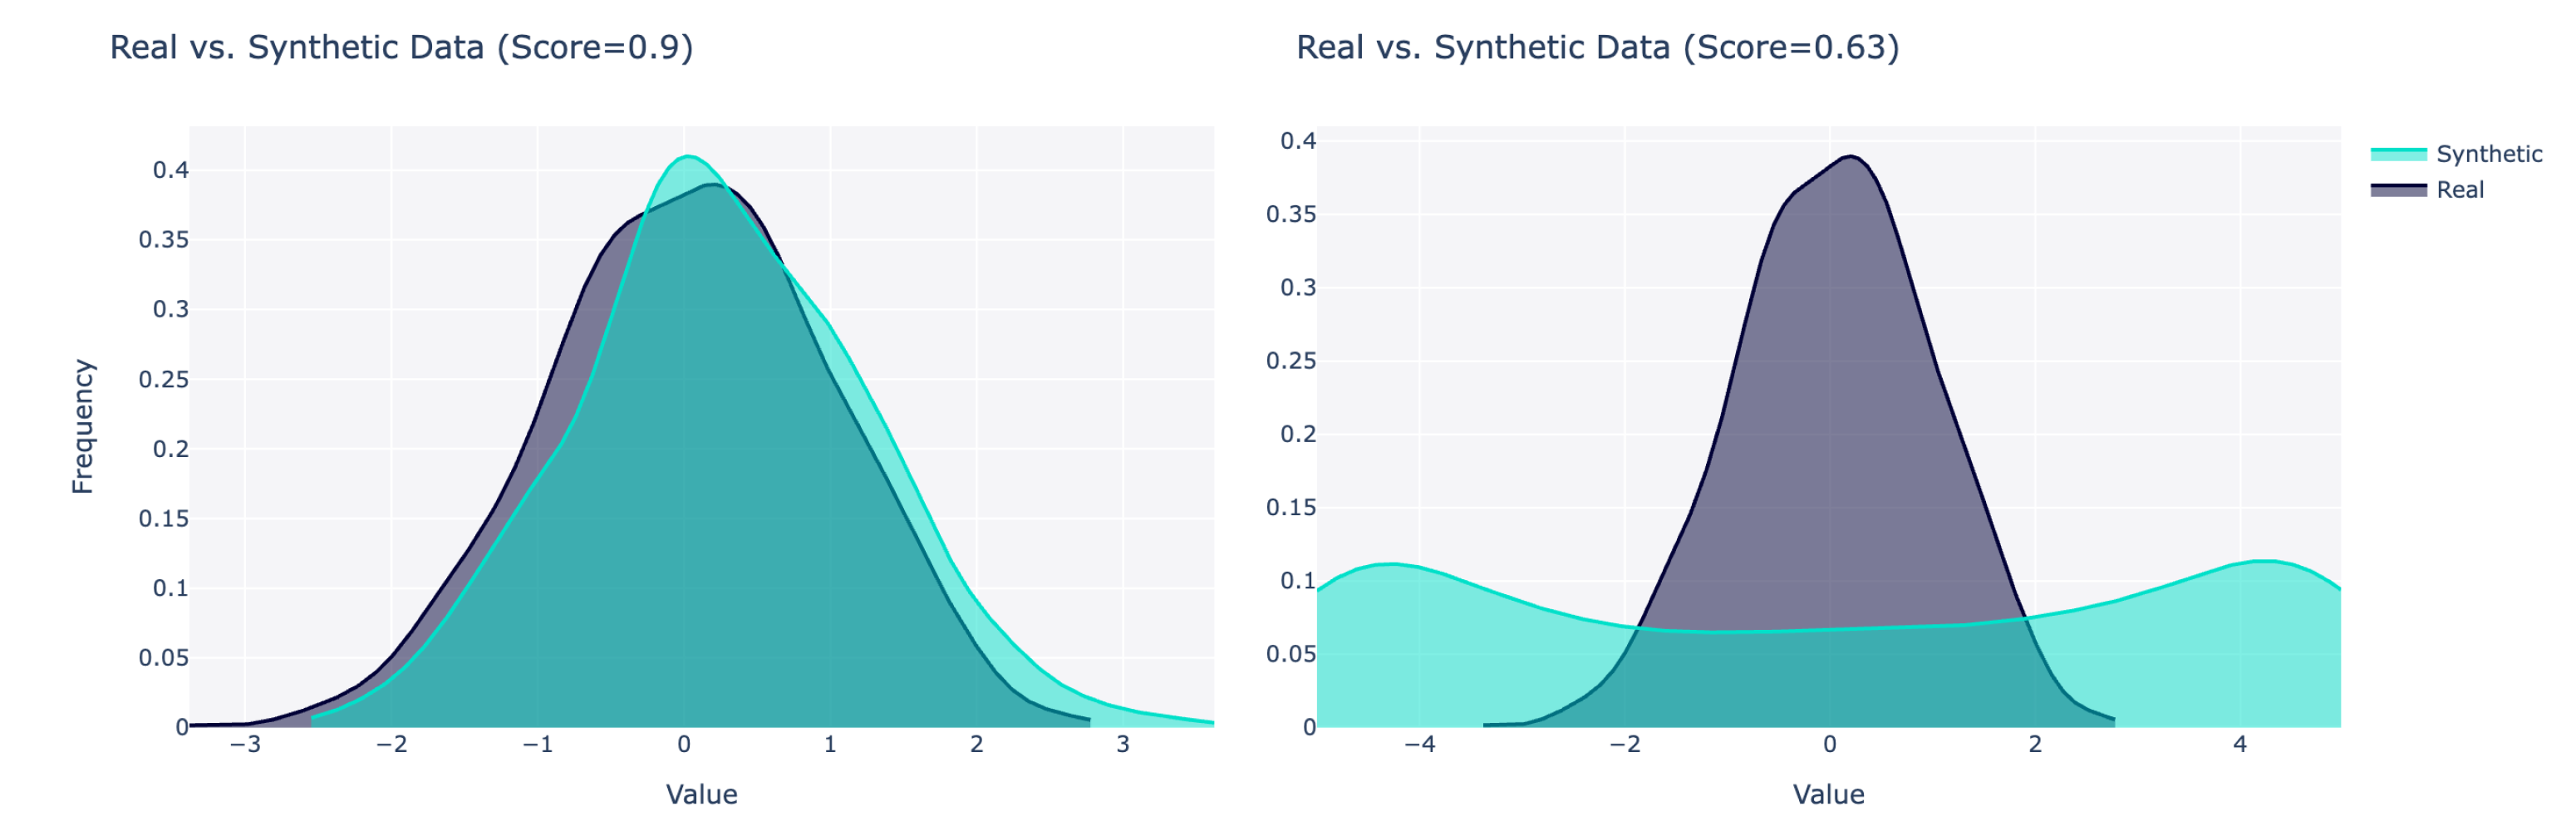

In [38]:
url2 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FUW59bGNawovc91YYxZb3%2FKS%20Complement.png?alt=media&token=a6848367-c764-4085-a8cd-6f471125f4a6"
res2 = requests.get(url2)
request_get_img2 = Image.open(BytesIO(res2.content))
request_get_img2

분포의 그림과 점수를 보면 왼쪽의 그림을 참조 했을 때 매우 유사하기 때문에 1.0에 매우 가까운 값을 가지는 것을 확인가능

원리는 Kolmogorov-Smirnov 통계량을 사용한다.   
이 통계를 계산하기 위해, Numeric 분포를 누적 분포 함수(CDF)로 변환한다.   
KS 통계량은 아래와 같이 두 CDF 간의 최대 차이이다.  

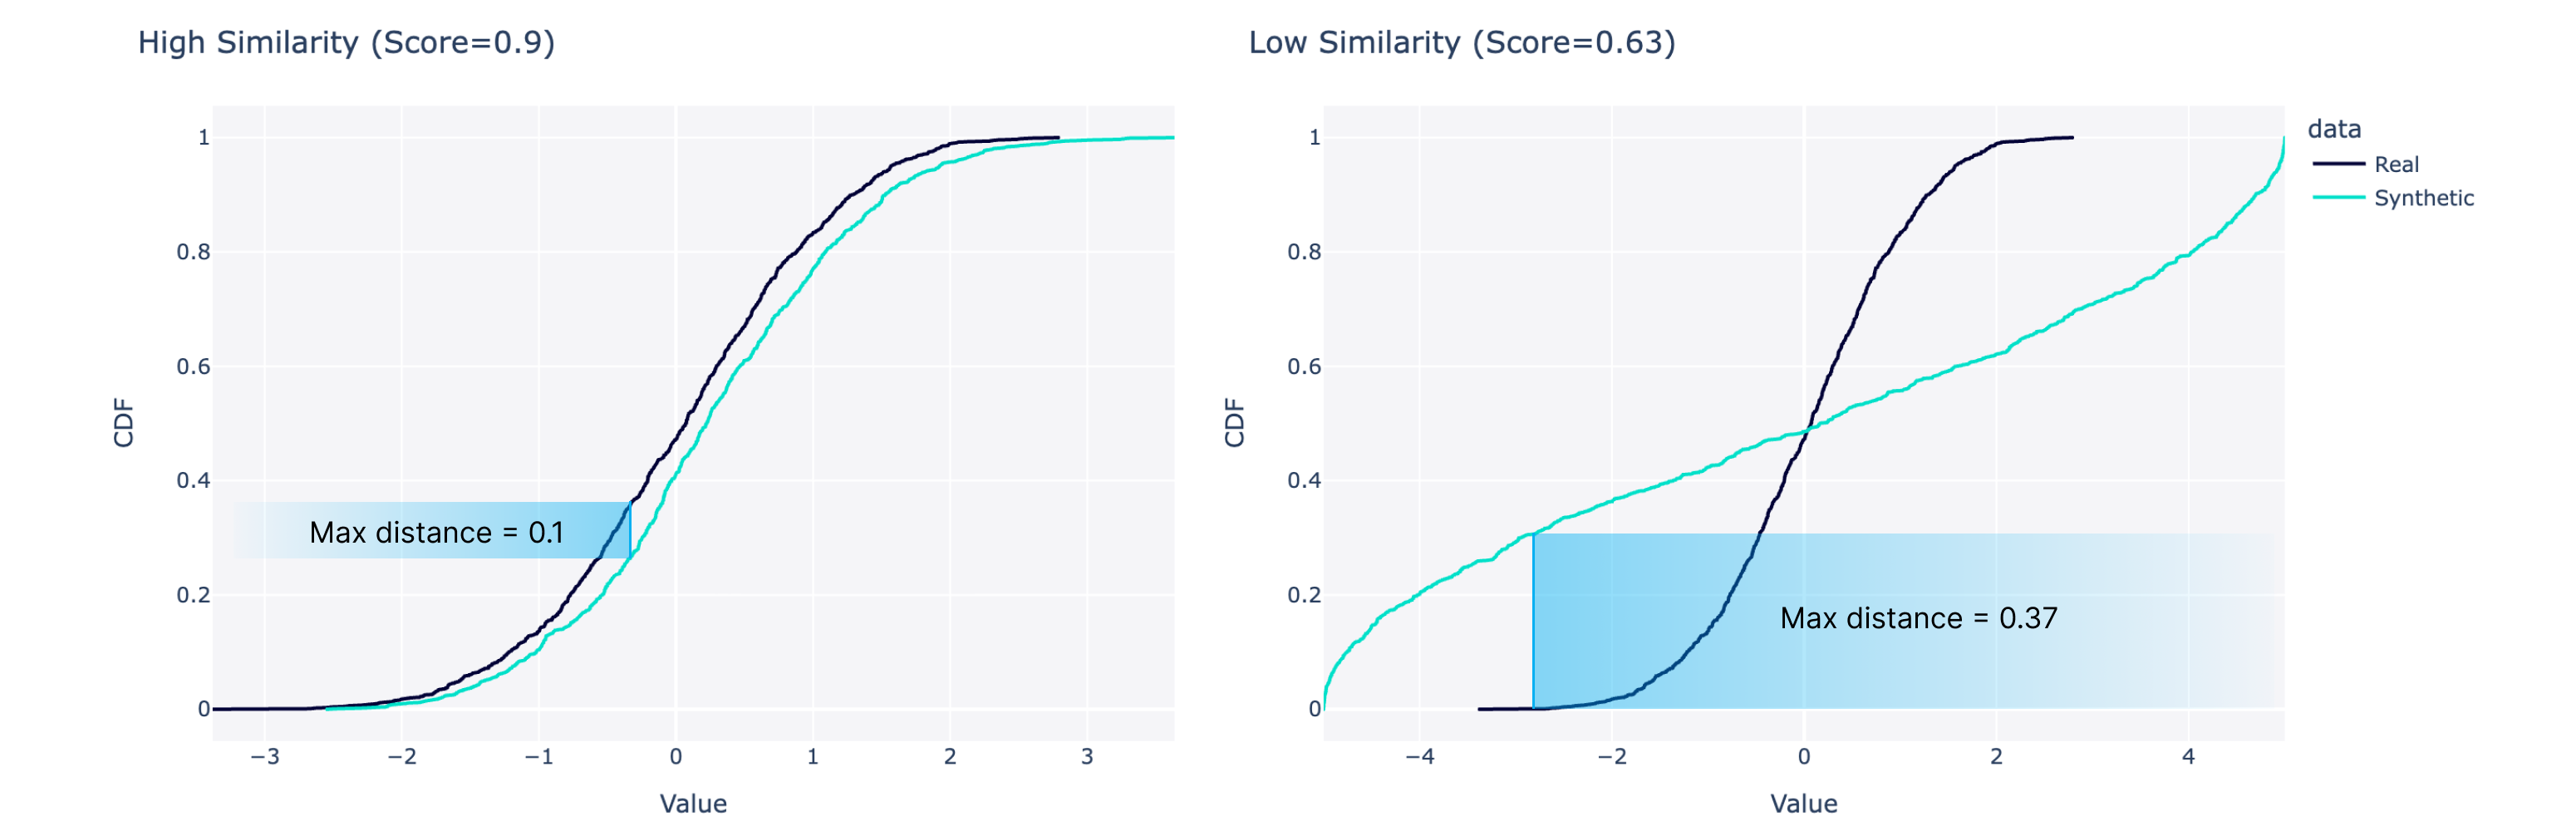

In [39]:
url3 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2F3W7cdGHbr4hPsyXV99XK%2FKS%20Complement%20Description.png?alt=media&token=01a20dc7-3557-4a72-8a9a-683cb02b4b33"
res3 = requests.get(url3)
request_get_img3 = Image.open(BytesIO(res3.content))
request_get_img3

왼쪽그림의 경우에는 통계량 값이 0.1이 나왔다면 KScomplement의 경우에는 0.9가 나올 것이다.

거리는 0과 1 사이의 값이다. SDMetrics에서는 통계량을 다음과 같이 변환한다:

KSComplement는 1 - (KS 통계량)을 반환하므로 점수가 높을수록 품질이 높다는 것을 의미한다.

In [ ]:
from sdmetrics.single_column import KSComplement

KSComplement.compute(
    real_data=real_table['column_name'],
    synthetic_data=synthetic_table['column_name']
)

파라미터 : 

- real_data : 실제자료에서의 한 개의 Column

- synthetic_data : 재현자료에서의 한 개의 Column

### ● TVComplement  

이 메트릭은 열 모양 ( 열의 한계 분포 또는 1D 히스토그램 ) 측면에서 실제자료의 Column 대 재현자료의 Column의 유사성을 계산한다.

1. Categorical : 범주형 자료 형태의 Column

2. Boolean : True , False 형태의 Column

 

※ 결측값은 무시함. 

점수는 0.0 ~ 1.0의 형태로 보여주고 1.0으로 갈수록 실제자료와 재현자료의 유사성이 높은것으로 판단하면 된다.

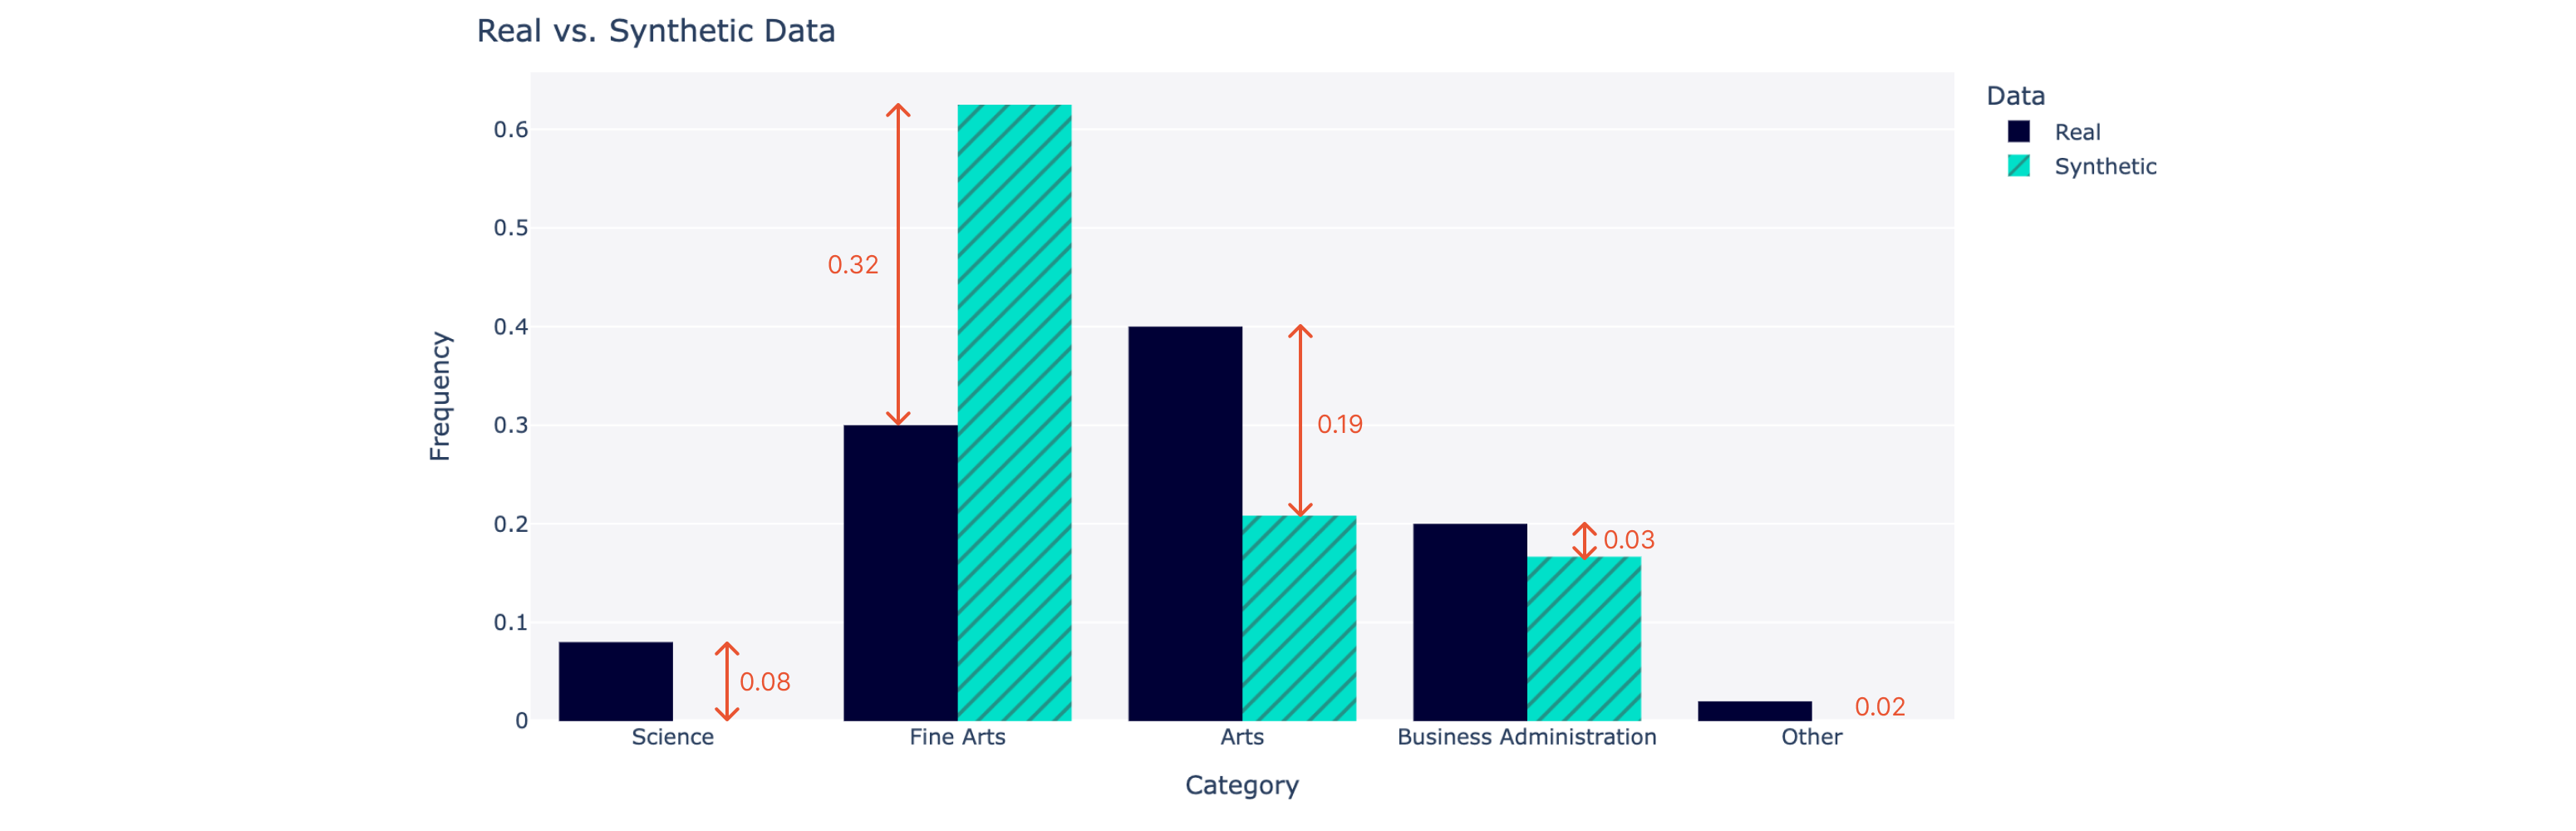

In [40]:
url4 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FmkB84N0DAdD7CjLrju9o%2FTVComplement.png?alt=media&token=a2805e78-2187-4eb1-ac50-98de805c12cf"
res4 = requests.get(url4)
request_get_img4 = Image.open(BytesIO(res4.content))
request_get_img4

실제 데이터와 재현자료간의 차이의 척도는 빨간색 글자로 적혀있음.

원리는 TVD 통계량을 사용한다. 이 검정에서는 실제 열과 합성 열 사이의 총 변동 거리(TVD)를 계산한다.   
이를 위해 먼저 각 범주 값의 빈도를 계산하여 확률로 표현한다. TVD 통계량은 아래 공식에 표시된 것처럼 확률의 차이를 비교한다.

$$ \delta(R,S) = \frac{1}{2}\sum\limits_{\omega\in\mathbb{\Omega}}|R_{\omega} - S_{\omega}| $$

R과 S는 해당 범주의 실제 및 재현자료의 빈도수를 나타낸다.

$$ score = 1 - \delta(R,S) $$  

TVComplement는 1 - TVD를 반환하므로 점수가 높을수록 품질이 향상된다.

In [ ]:
from sdmetrics.single_column import TVComplement

TVComplement.compute(
    real_data=real_table['column_name'],
    synthetic_data=synthetic_table['column_name']
)

파라미터 : 

- real_data : 실제자료에서의 한 개의 Column

- synthetic_data : 재현자료에서의 한 개의 Column

## 2. Column Pair Trends 

재현자료와 실제자료의 추세를 확인해보고 싶을때 상관관계와 같은 척도를 이용하여 비교한다.

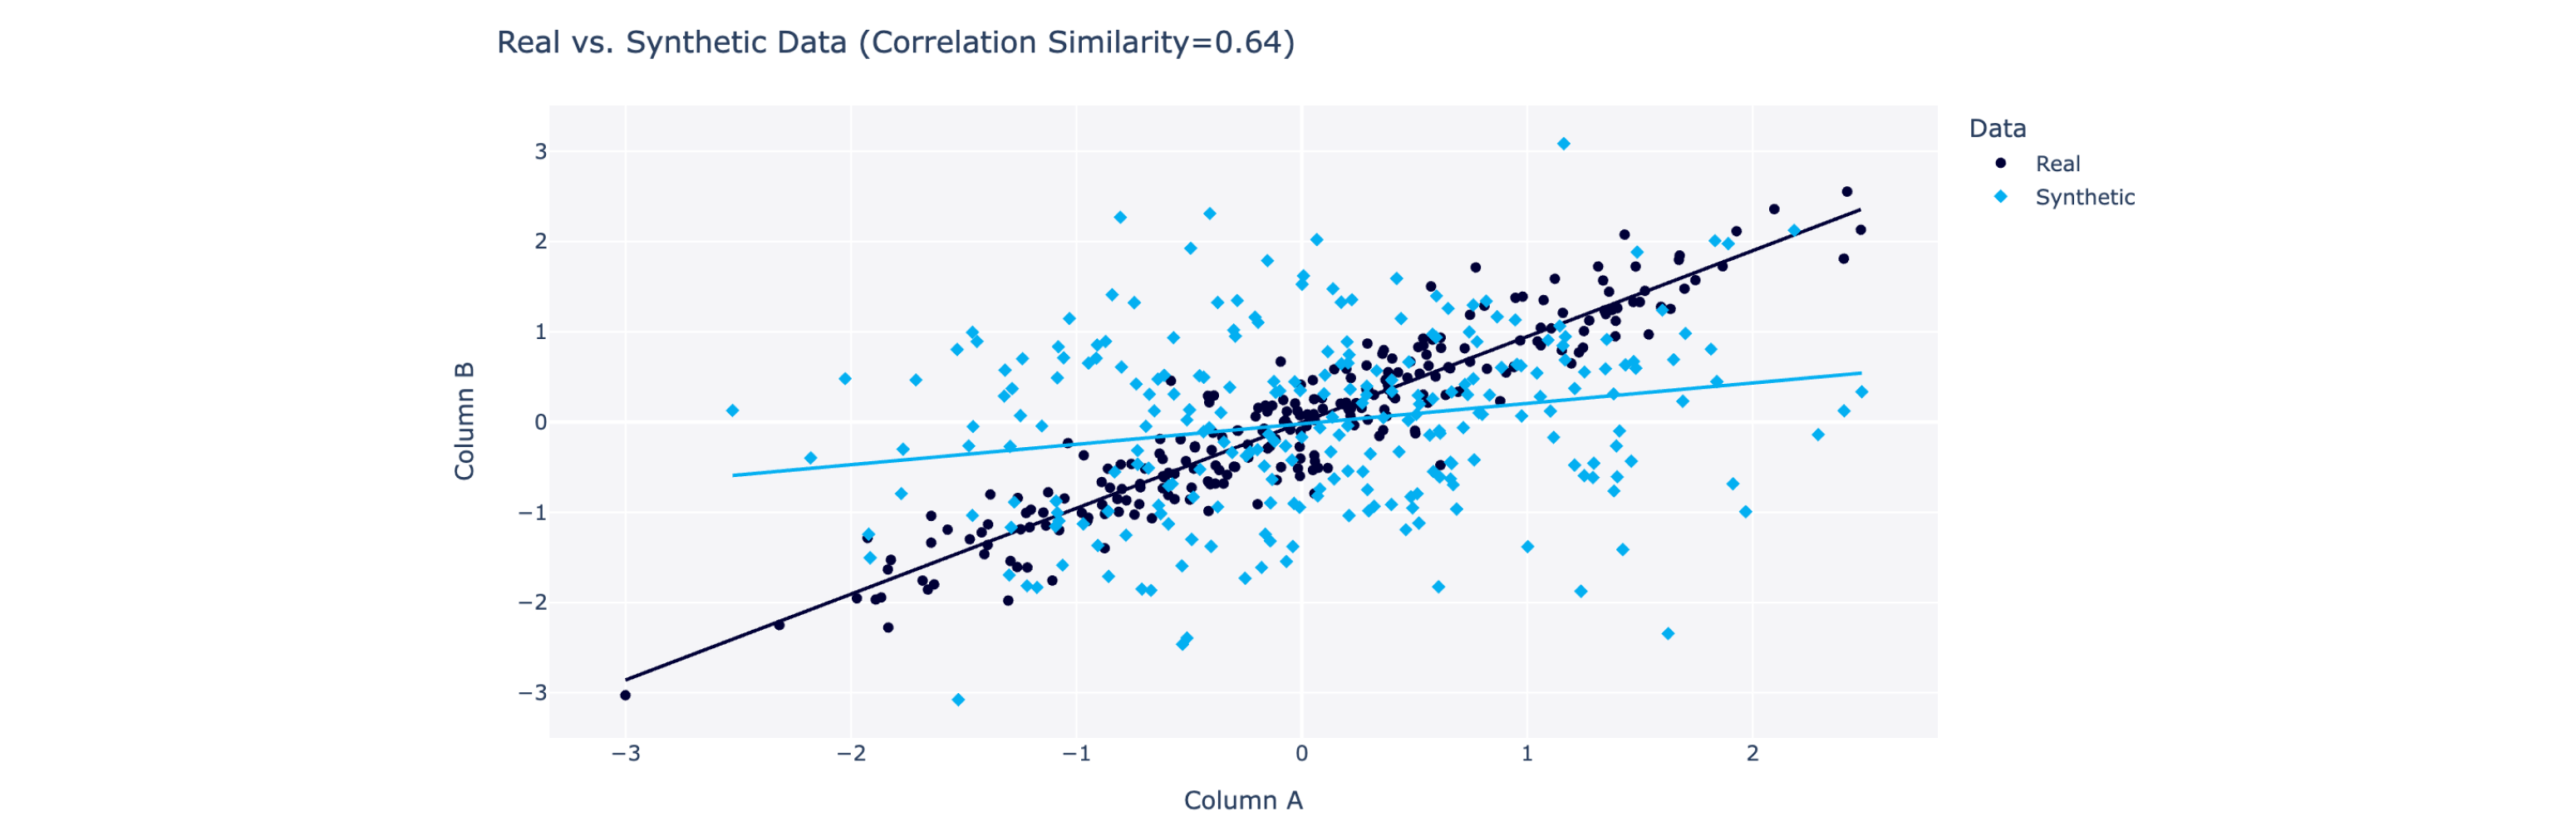

In [41]:
url5 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2Fv6rZe9pmZQza1tfxBEnv%2FCorrelation%20Similarity.png?alt=media&token=2847ee25-dc42-45aa-9238-6a69286895ac"
res5 = requests.get(url5)
request_get_img5 = Image.open(BytesIO(res5.content))
request_get_img5

방법도 각 열의 종류가 무엇인가에 따라서 다른 평가방법을 보여준다.



① Numerical with another Numerical ( including datetime ) -> CorrelationSimilarity

② Categorical with another Categorical  -> ContingencySimilarity 

③ Numerical with a Categorical -> 수치화 열을 빈도수로 이산화 한 후 ContingencySimilarity 적용 



## 3. CorrelationSimiliarity 

이 메트릭은 한 쌍의 숫자 열 사이의 상관 관계를 측정하고 실제자료와 합성 데이터 간의 유사성을 계산한다.

즉, 2D 분포의 추세를 비교한다. 이 메트릭은 상관 관계를 측정하기 위해 Pearson 및 Spearman의 상관계수를 이용 할 수 있다.



1. Numerical : 이 메트릭은 연속적인 수치 데이터를 의미한다. 

2. Datetime : 이 메트릭은 날짜 시간의 값을 숫자 값으로 변환한다. 



점수는 0.0 ~ 1.0의 형태로 보여주고 1.0으로 갈수록 실제자료와 재현자료의 유사성이 높은것으로 판단하면 된다.

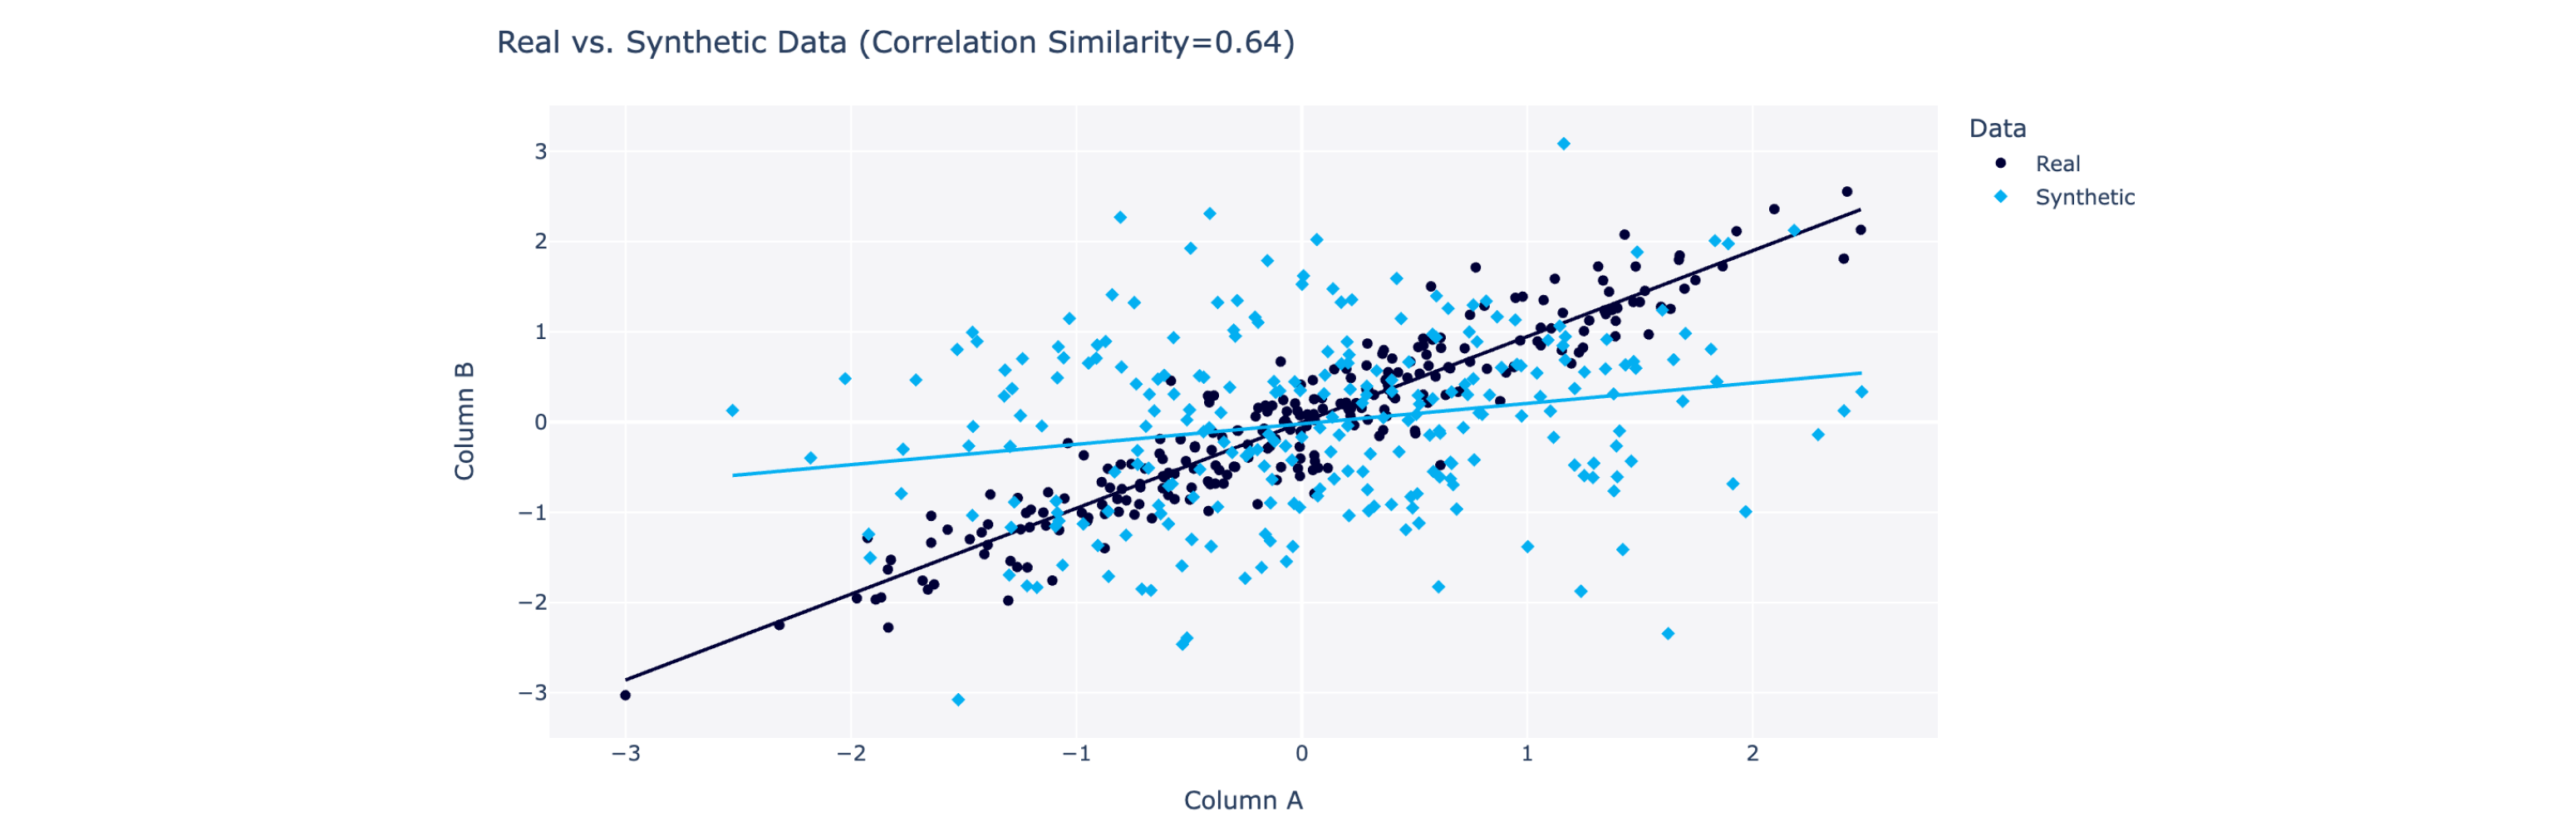

In [42]:
url6 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2Fv6rZe9pmZQza1tfxBEnv%2FCorrelation%20Similarity.png?alt=media&token=2847ee25-dc42-45aa-9238-6a69286895ac"
res6 = requests.get(url6)
request_get_img6 = Image.open(BytesIO(res6.content))
request_get_img6


실제 데이터의 경우에는 상관계수가 0.93이 나왔지만 재현자료의 경우에는 0.22가 나왔다 따라서 전체적인 유사점수는 0.64이다 여기서 재현자료가 노이즈를 더한 추세를 지니고 있다는 것을 확인 할 수 있다.


원리는 열 A와 B 쌍의 경우 검정은 실제자료와 재현자료간의 R과 S에 대한 상관 계수를 계산한다. 이렇게 하면 두 개의 서로 다른 상관 관계 값이 생성된다. 검정은 아래 공식을 사용하여 유사성 점수를 정규화하고 반환한다.

$$ score = 1 - \frac{|S_{A,B} - R_{A,B}|}{2}$$

상관계수를 계산하는 방법은 여러가지가 있는데 지원하는 상관계수의 종류로는 피어슨과 스피어만의 상관계수를 지원한다. 둘다 -1 ~ +1 사이의 경계이다. 

○ +1에 가까울수록 한 열이 증가하면 다른 열도 선형적으로 증가할 가능성이 높다는 뜻이며,   
○ -1에 가까울수록 한 열이 증가하면 다른 열은 선형적으로 감소할 가능성이 높다는 뜻이다.   
○ 0에 가깝다면 한 열과 그 열 간의 선형적인 관계가 없다는 것을 의미한다. 

In [ ]:
from sdmetrics.column_pairs import CorrelationSimilarity

CorrelationSimilarity.compute(
    real_data=real_table[['column_1', 'column_2']],
    synthetic_data=synthetic_table[['column_1', 'column_2']],
    coefficient='Pearson'
)

파라미터 :

- real_data : 실제자료에서의 두개의 Column

- synthetic_data : 재현자료에서의 두개의 Column

- coefficient : 피어슨 상관계수를 이용할지, 스피어만 상관계수를 이용할지 

## 4. ContingencySimiliarity

이 메트릭은 실제자료의 세트와 재현자료 세트 사이의 범주형 열 쌍의 유사성을 계산한다. 즉, 2D 분포를 비교한다.



1. Categorical : 범주형 자료 형태의 열 

2. Boolean : True , False 형태의 열 



※ 이 메트릭을 사용하려면 두 열이 모두 호환되어야 한다. 열에 결측값이 있으면 메트릭은 이 값을 추가 단일 범주로 처리한다.



점수는 0.0 ~ 1.0의 형태로 보여주고 1.0으로 갈수록 실제자료와 재현자료의 유사성이 높은것으로 판단하면 된다.

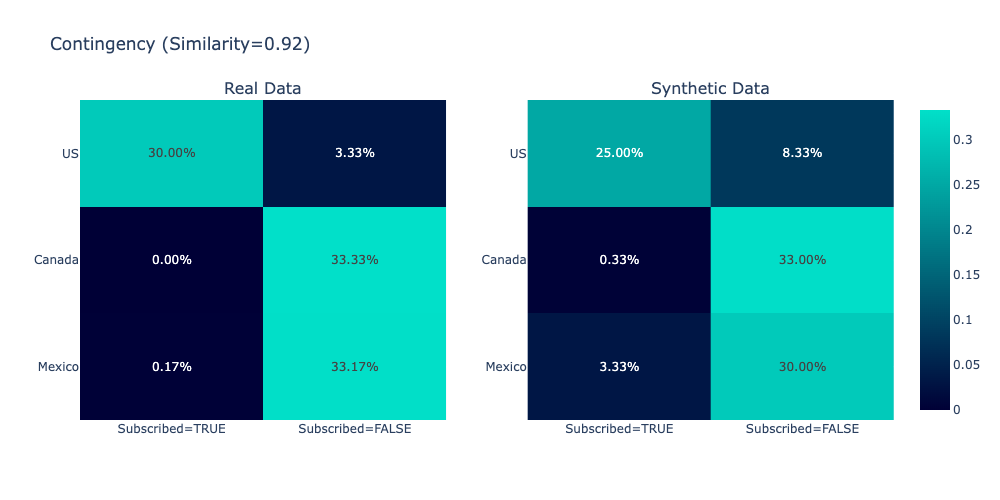

In [43]:
url7 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FTPBa95q90y0vkyvL1oao%2Fnewplot%20(4).png?alt=media&token=db07a508-0ea0-46b0-b520-1d8e0a7899ea"
res7 = requests.get(url7)
request_get_img7 = Image.open(BytesIO(res7.content))
request_get_img7

열 A와 B 쌍의 경우 검정은 실제자료와 합성 데이터에 대한 정규화된 분할표를 계산한다.

표에서는 A와 B에서 범주의 각 조합이 있는 행의 비율을 설명합니다. 총 변동 거리를 사용하여 분할표 간의 차이를 계산한다. 마지막으로 점수가 높으면 유사성이 높다는 것을 보장하기 위해 1에서 거리를 뺀다. 

$$ score = 1 - \frac{1}{2}\sum\limits_{\alpha\in\mathbb{A}}\sum\limits_{\beta\in\mathbb{B}}|S_{\alpha,\beta} - R_{\alpha,\beta}|$$

공식에서 α는 열 A의 모든 가능한 범주를 설명하고, β는 열 B의 모든 가능한 범주를 설명합니다. 한편, R과 S는 해당 범주의 실제자료 및 재현자료의 빈도를 나타낸다.

In [ ]:
from sdmetrics.column_pairs import ContingencySimilarity

ContingencySimilarity.compute(
    real_data=real_table[['column_1', 'column_2']],
    synthetic_data=synthetic_table[['column_1', 'column_2']]
)

파라미터 :



- real_data : 실제자료에서의 두개의 Column

- synthetic_data : 재현자료에서의 두개의 Column

## 5. QualityReport

싱글 테이블의 경우이므로 싱글 테이블에서 선언해준다.

In [ ]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()

### 1. generate(real_data, synthetic_data, metadata)

In [ ]:
report.generate(real_data, synthetic_data, metadata)

파라미터 : 

- real_data : 실제자료

- synthetic_data : 재현자료

- metadata : 싱글테이블 패키지에서 선언한 데이터 ( 보통 real_data와 일치 ) 

- verbose : 진행과정을 보여줄지 안보여줄지를 결정함 True값이 보여주는것 , False가 안보여주는 것 

### 2. get_score()

전체적인 재현자료와 실제자료간의 유사도 점수를 보고자 할 때 ( 0 ~ 1 사이 값 )

In [ ]:
report.get_score()

### 3. get_properties()

이 메트릭이 측정한 각각의 특성을 보고자 할 때

In [ ]:
report.get_properties()

###  4. get_details()

어떤 특정한 열에 대해서 특성을 알고 싶을 때 

In [ ]:
report.get_details(property_name='Column Shapes')

파라미터 : 

- property_name : 'Column Shapes' or 'Column Pair Trends' 



예를 들어 'Column Shapes' 라는 파라미터를 넣었을 경우 각 열의 이름을 보여주고 위에서 설명한 어떤 메트릭을 썼는지와  전체적인 열의 점수를 보여준다.

### 5. Visualizing the report 

#### 1. get_visualization(property_name)

In [ ]:
fig = report.get_visualization(property_name='Column Shapes')
fig.show()

파라미터 :

- property_name : 'Column Shapes' or 'Column Pair Trends' 



위에서 같은 결과를 보여주지만 시각화 하기 좋은 메트릭이라고 생각하면 된다.

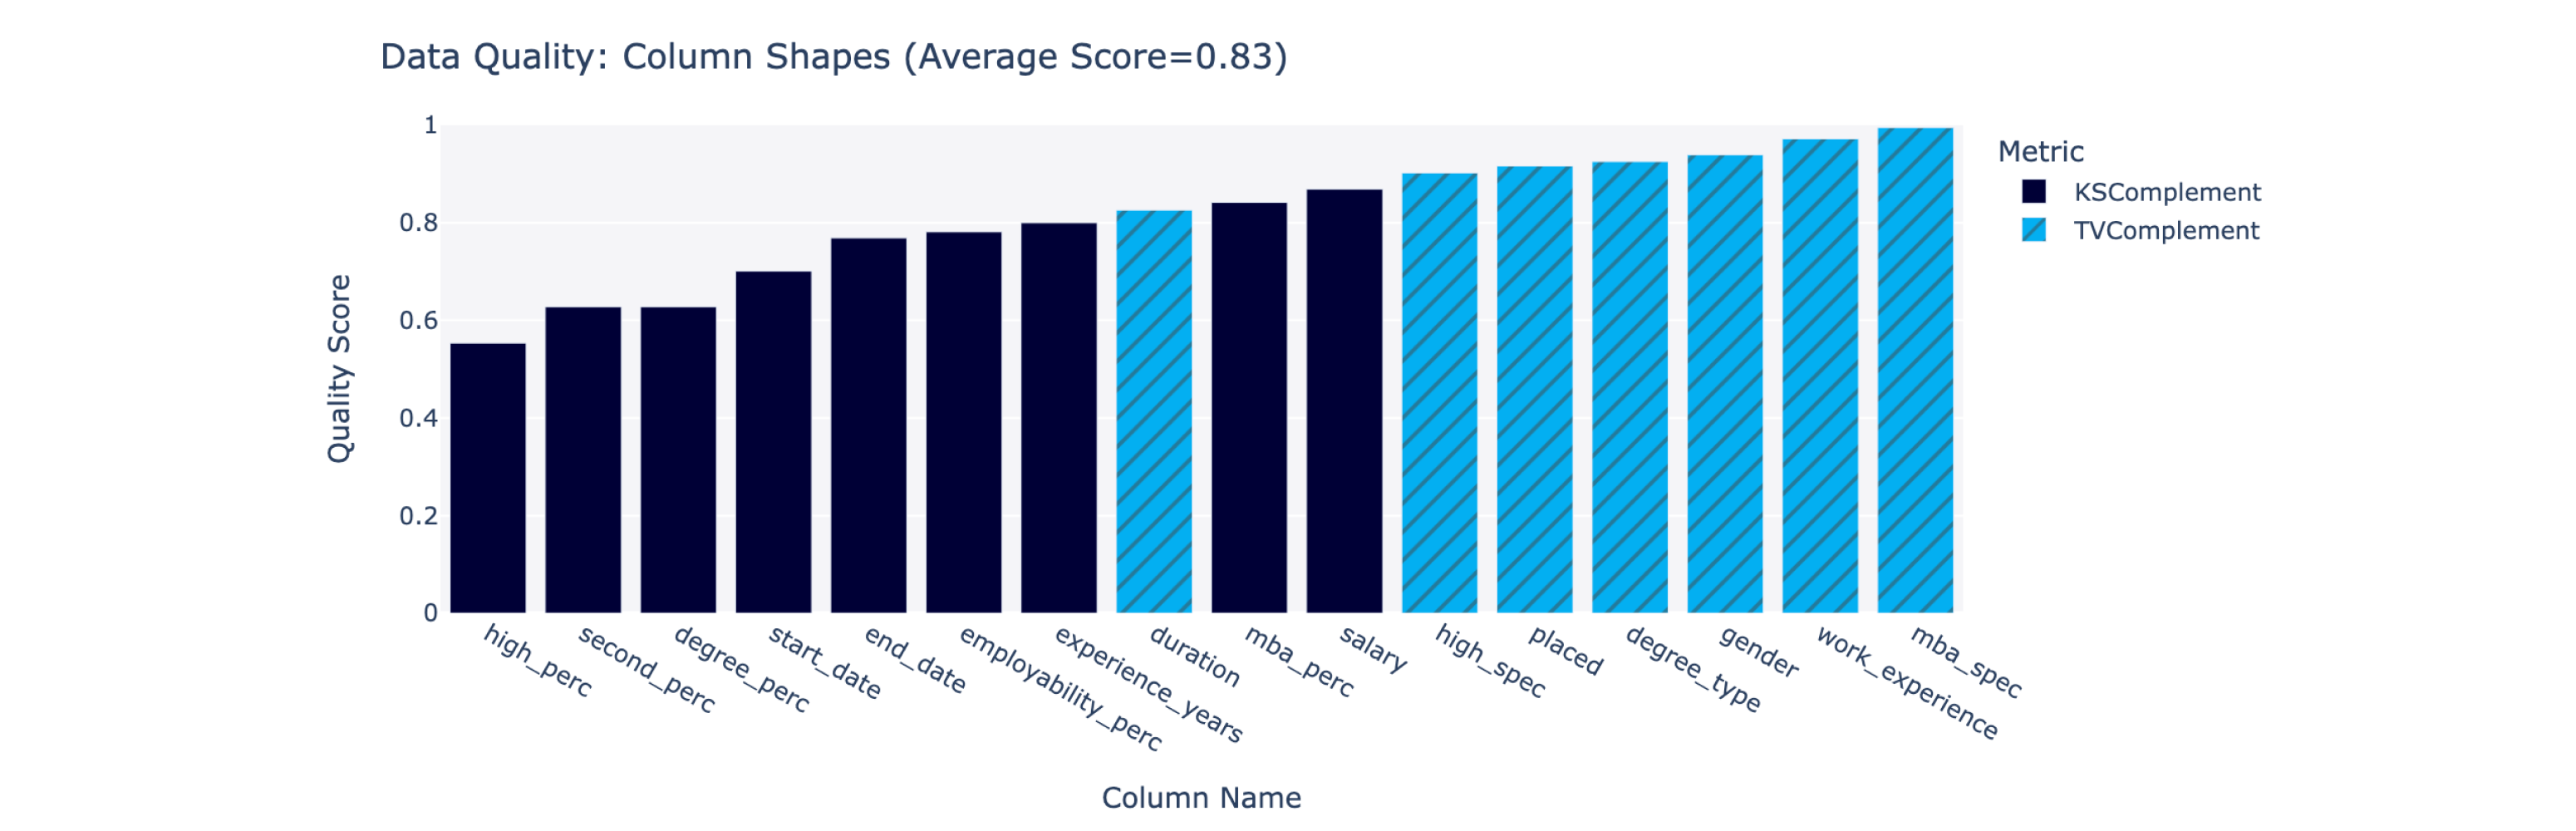

In [44]:
url8 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2F3iuEXPA4ITh8SPomjFGR%2FQuality%20Report_%20Column%20Shapes.png?alt=media&token=bbe7fe8a-ffd6-4918-838d-0721aa5e2389"
res8 = requests.get(url8)
request_get_img8 = Image.open(BytesIO(res8.content))
request_get_img8

위 결과들은 피클파일로 저장 가능하며, 불러오기도 가능하다. 

In [ ]:
from sdmetrics.reports.single_table import QualityReport

report.save(filepath='results/quality_report.pkl')
report = QualityReport.load('results/quality_report.pkl')

## 7. Diagnostic Report

코드 :

싱글 테이블의 경우이므로 싱글 테이블에서 선언해준다.



In [ ]:
from sdmetrics.reports.single_table import DiagnosticReport

report = DiagnosticReport()

### 1. generate(real_data, synthetic_data, metadata)

파라미터 :

- real_data : 실제자료

- synthetic_data : 재현자료

- metadata : 싱글테이블 패키지에서 선언한 데이터 ( 보통 real_data와 일치 ) 

- verbose : 진행과정을 보여줄지 안보여줄지를 결정함 True값이 보여주는것 , False가 안보여주는 것 

In [ ]:
report.generate(real_data, synthetic_data, metadata)

### 2. get_results()

In [ ]:
report.get_results()

### 3. get_properties()

In [ ]:
report.get_properties()

각각의 특성의 이름과 점수를 반환해준다. 

### 4. get_details(property_name)

In [ ]:
report.get_details(property_name='Coverage')

'Coverage' 의 경우에는 각 개별 열의 이름, 계산에 사용된 메트릭 및 해당 열의 전체 점수를 표시한다.

파라미터 :

- property_name : 'Synthesis' , 'Coverage' , 'Boundaries'

### 5. Visualizing the report 

In [ ]:
fig = report.get_visualization(property_name='Coverage')
fig.show()

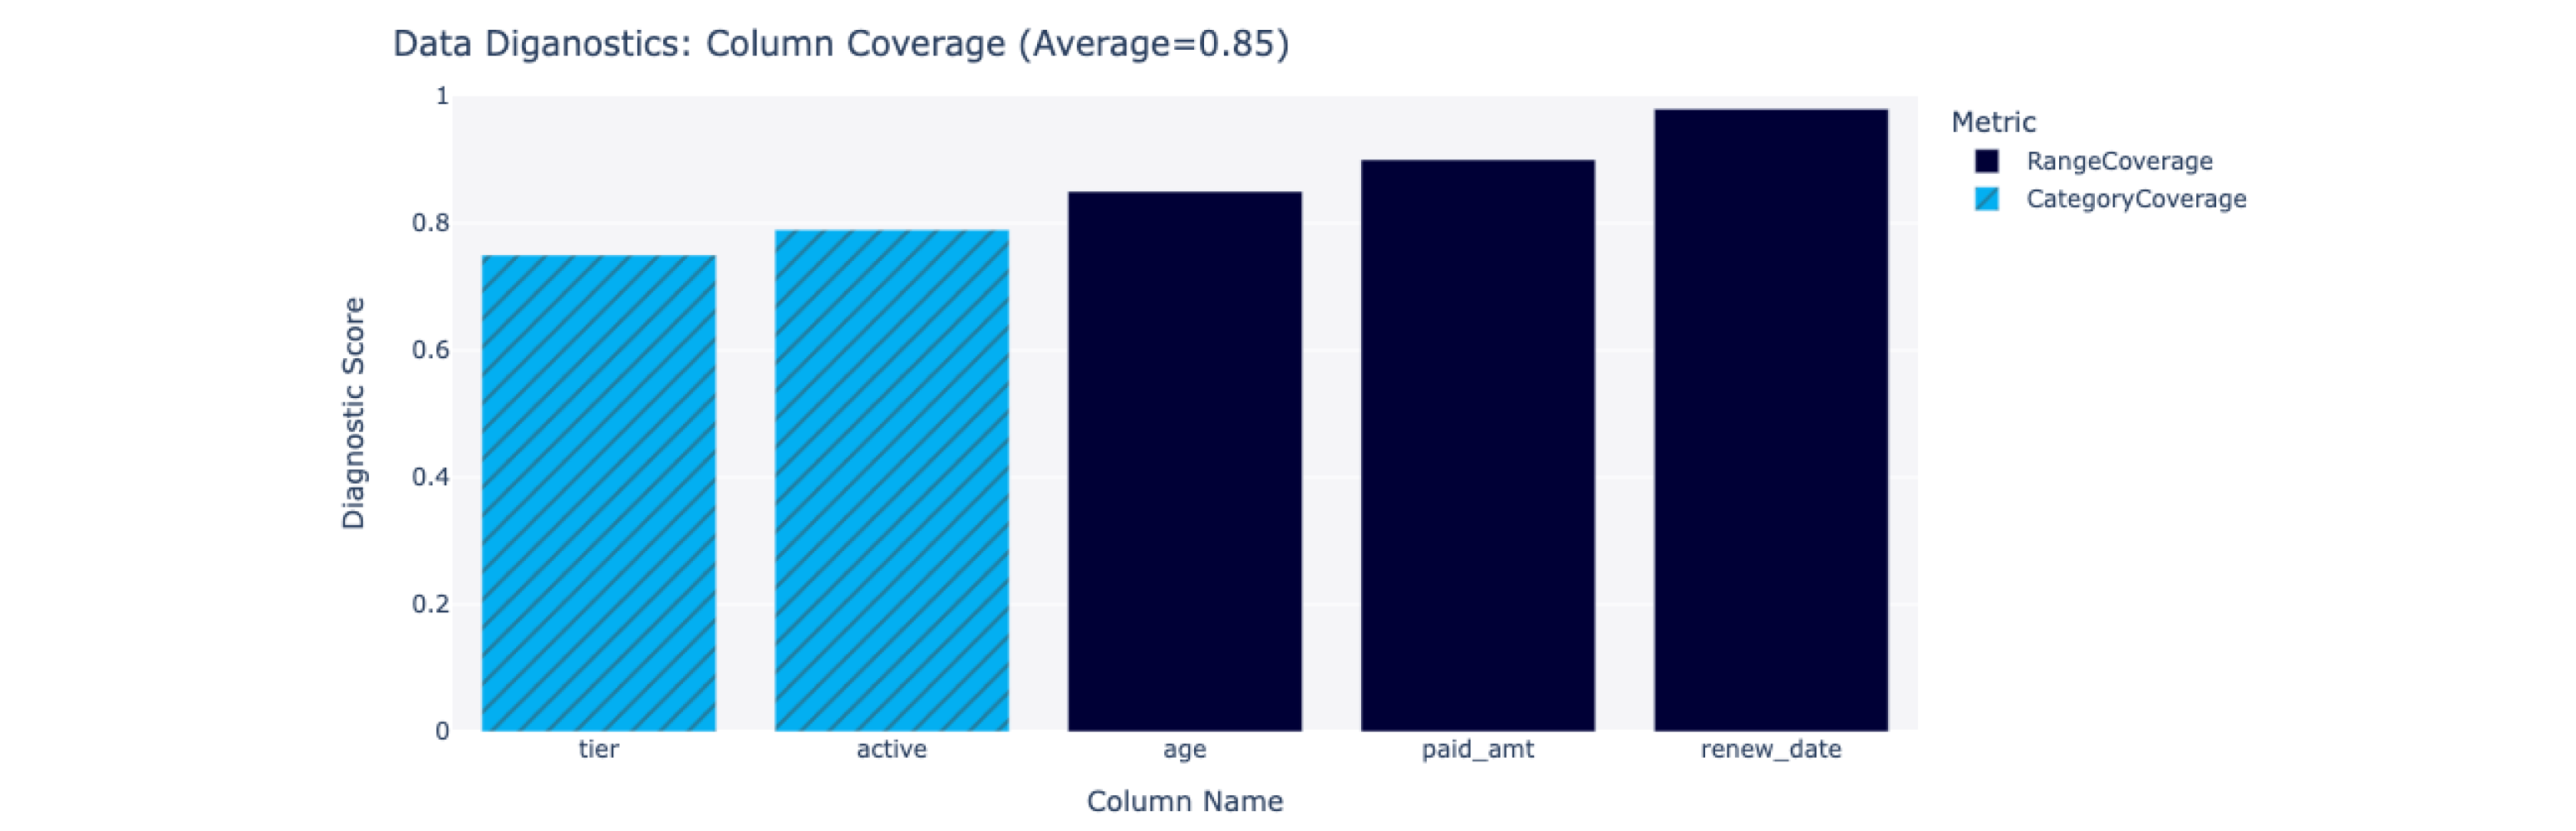

In [45]:
url9 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FecK6hARdASMqOt5HEmjc%2FDiagnostic%20Report_%20Column%20Coverage.png?alt=media&token=105aedfe-60e8-4491-8afc-4dd01f3a4854"
res9 = requests.get(url9)
request_get_img9 = Image.open(BytesIO(res9.content))
request_get_img9

위 결과들은 피클파일로 저장 가능하며, 불러오기도 가능하다. 

In [ ]:
from sdmetrics.reports.single_table import DiagnosticReport

report.save(filepath='results/diagnostic_report.pkl')
report = DiagnosticReport.load('results/diagnostic_report.pkl')

## 8. Visualization Utilities 

### 1. 1D 형태로 실제자료와 재현자료의 분포 표현

In [ ]:
from sdmetrics.reports import utils

fig = utils.get_column_plot(
    real_data=real_table,
    synthetic_data=synthetic_table,
    column_name='high_perc',
    metadata=my_table_metadata_dict
)

fig.show()

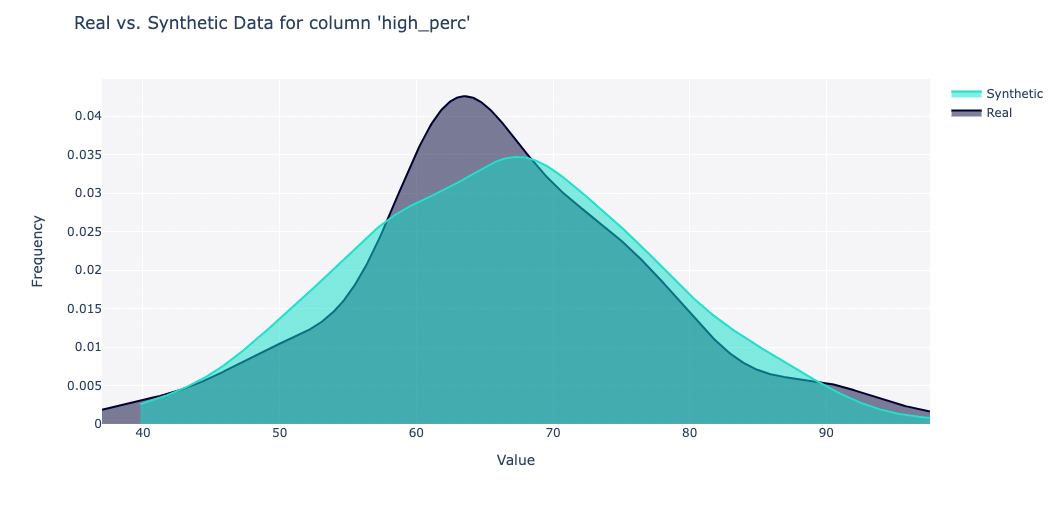

In [46]:
url10 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FSqv1M4pqnxbfGdlj1aWp%2FScreen%20Shot%202022-07-20%20at%206.46.46%20PM.png?alt=media&token=09ebc093-9926-43c5-a402-3af691b952e6"
res10 = requests.get(url10)
request_get_img10 = Image.open(BytesIO(res10.content))
request_get_img10

파라미터 : 

- real_data : 실제자료

- synthetic_data : 재현자료

- metadata : 싱글테이블 패키지에서 선언한 데이터 ( 보통 real_data와 일치 ) 

- column_name : 자신이 표현하고 싶은 열  

### 2. 2D 형태로 실제자료와 재현자료의 분포 표현

In [ ]:
from sdmetrics.reports import utils

fig = utils.get_column_pair_plot(
    real_data=real_table,
    synthetic_data=synthetic_table,
    column_names=['mba_perc', 'degree_perc'],
    metadata=my_table_metadata_dict
    
)

fig.show()

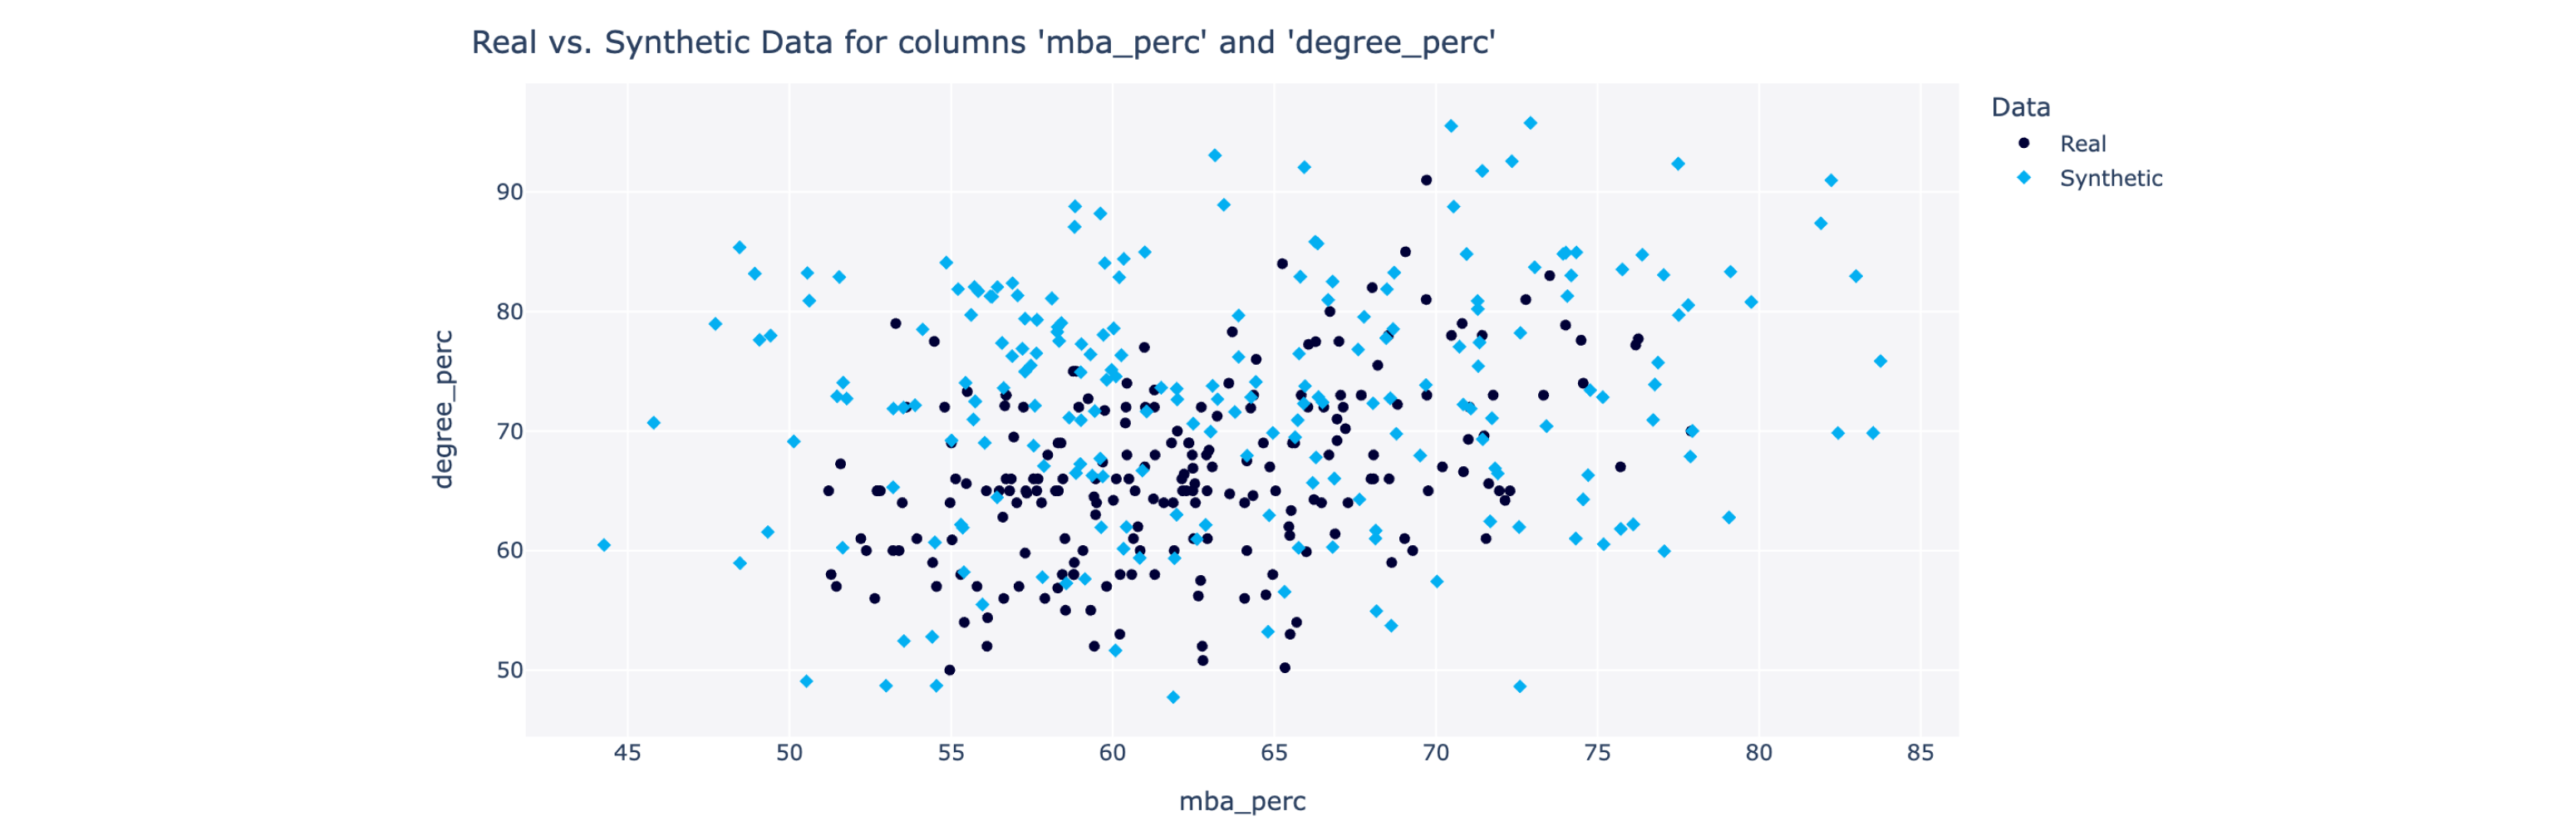

In [47]:
url11 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FuK0YRiAE7BnIUFISWNFu%2FQuality%20Report_%20Plotting%20Column%20Pairs.png?alt=media&token=1f96139c-c08a-4cf0-b6f3-39fb1477b061"
res11 = requests.get(url11)
request_get_img11 = Image.open(BytesIO(res11.content))
request_get_img11

파라미터 :

- real_data : 실제자료에서의 두개의  Column

- synthetic_data : 재현자료에서의 두개의 Column

- metadata : 싱글테이블 패키지에서 선언한 데이터 ( 보통 real_data와 일치 ) 

- column_name : 자신이 표현하고 싶은 열 ( 2개 )  

## 9. BoundaryAdherence

이 메트릭의 경우 재현자료의 한 열이 실제자료의 최소값과 최대값을 준수하는지의 여부를 측정한다. 실제 경계를 준수하는 재현자료의 행의 백분율을 반환한다. 



1. Numerical : 이 메트릭은 연속적인 수치 데이터를 의미한다. 

2. Datetime : 이 메트릭은 날짜 시간의 값을 숫자 값으로 변환한다. 



※ 결측값은 무시함. 



점수는 0.0 ~ 1.0의 형태로 보여주고 1.0으로 갈수록 실제자료와 재현자료의 최소/최대값의 범위를 준수하는 것으로 판단하면 된다.

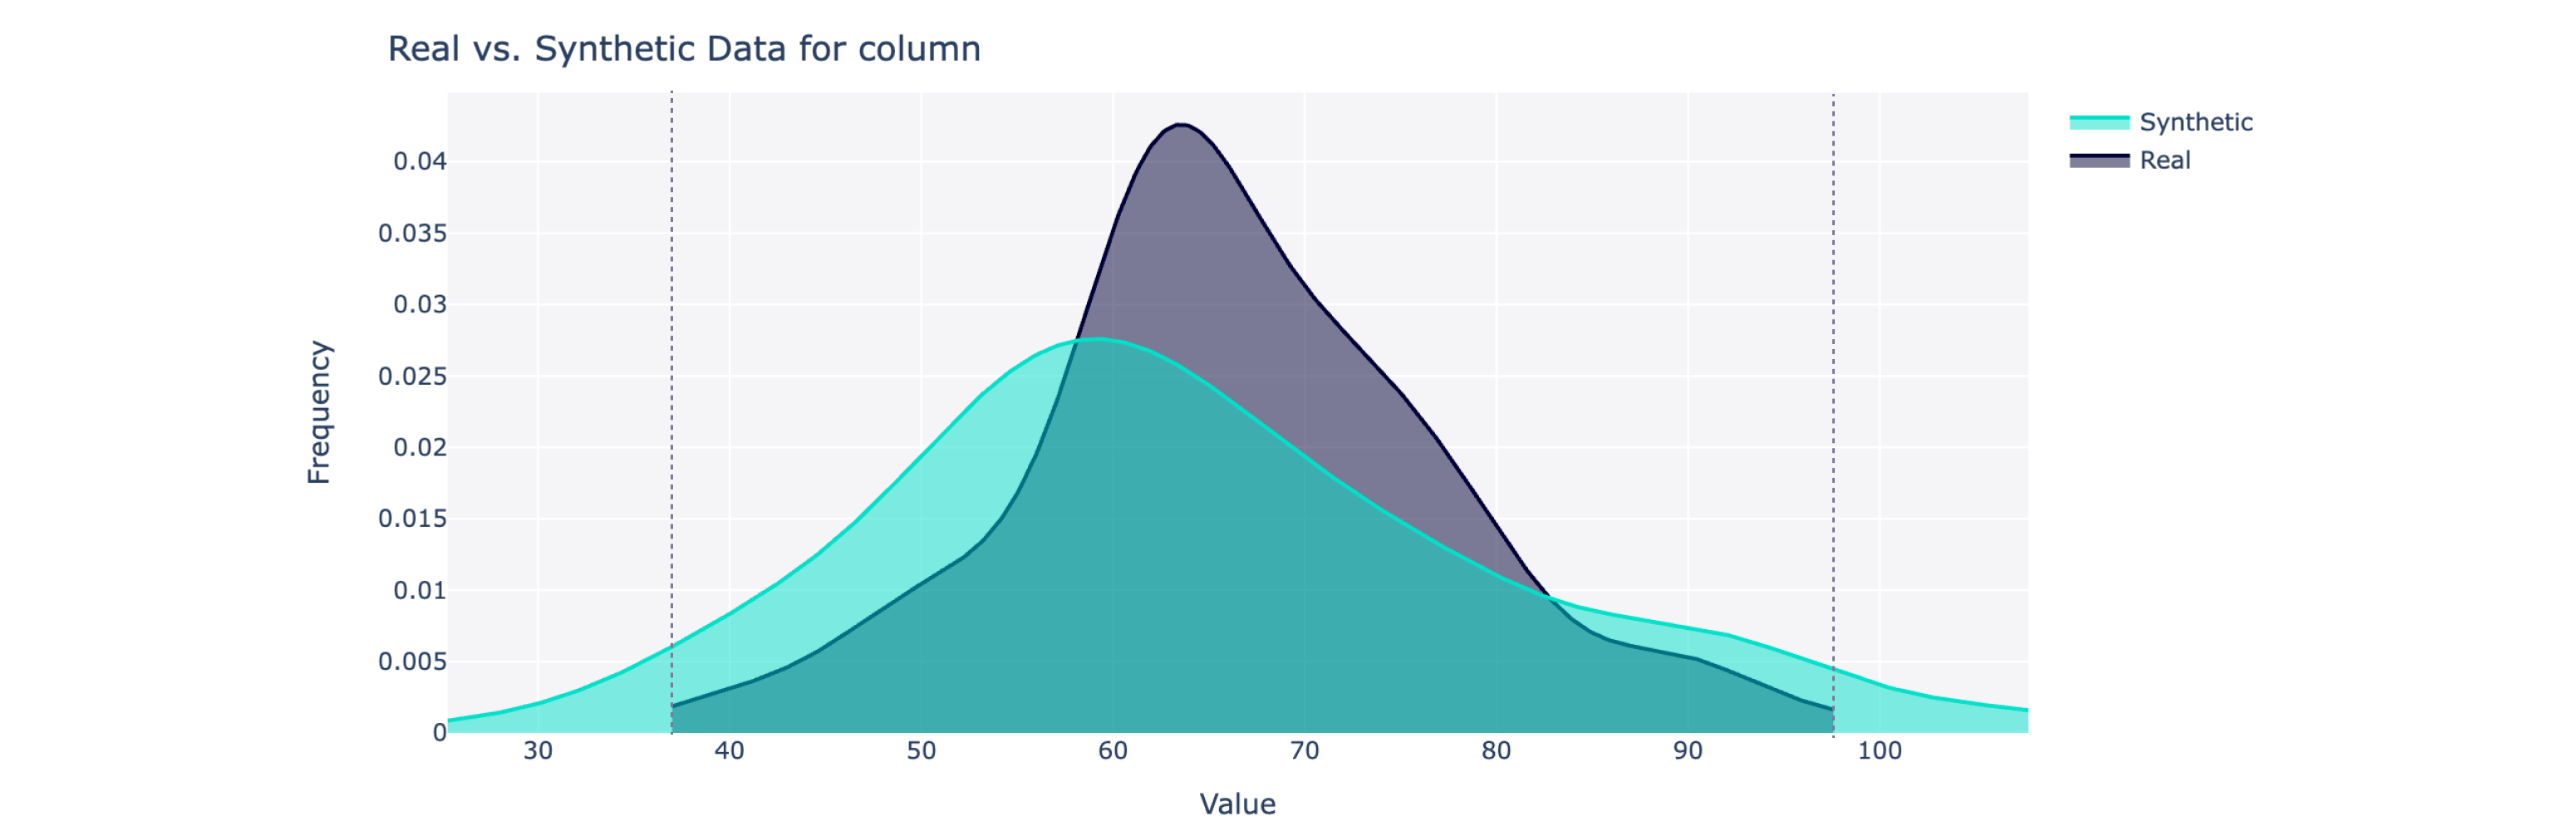

In [48]:
url12 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FhGhxNaSO7X0Eknn9TxWX%2FBoundary%20Adherence.png?alt=media&token=5110e24c-81b5-476c-93fc-75a8fcf04a6c"
res12 = requests.get(url12)
request_get_img12 = Image.open(BytesIO(res12.content))
request_get_img12

이 메트릭은 실제자료의 Column의 최소값 최대값을 계산하고, 그런 다음 [min,max] 범위에 있는 합성 값의 빈도를 계산한다.

In [ ]:
from sdmetrics.single_column import BoundaryAdherence

BoundaryAdherence.compute(
    real_data=real_table['column_name'],
    synthetic_data=synthetic_table['column_name']
)

파라미터 : 

- real_data : 실제자료에서의 하나의 Column

- synthetic_data : 재현자료에서의 하나의 Column

## 10. CategoricalCAP

CategoricalCAP의 경우 민감한 정보를 노출할 위험을 측정한다. 실제자료가 공공 데이터라고 가정했을때 공격자는 이를 재현자료와 결합하여 중요한 다른 실제 값에 대해 추측한다. 

이 메트릭은 공격자가 cap이라는 알고리즘을 사용하여 중요한 정보를 정확하게 추측하는 것이 얼마나 어려운지를 설명한다. ( 정보노출에 대한 이해가 필요 ) 



1. Categorical : 범주형 자료 형태의 열 

2. Boolean : True , False 형태의 열 



범위가 0에서 1로 가며 1로 가면 갈수록 실제자료는 공격으로부터 100% 안전하다는 것을 의미한다. 공격자는 CAP 알고리즘을 적용하여 중요한 값을 정확하게 추측 할 수 없는 것을 의미한다. 예를 들어 0.55 의 값이 나왔다고 한다면 일반적인 공격으로부터 55% 안전하다는 것을 나타낸다. 

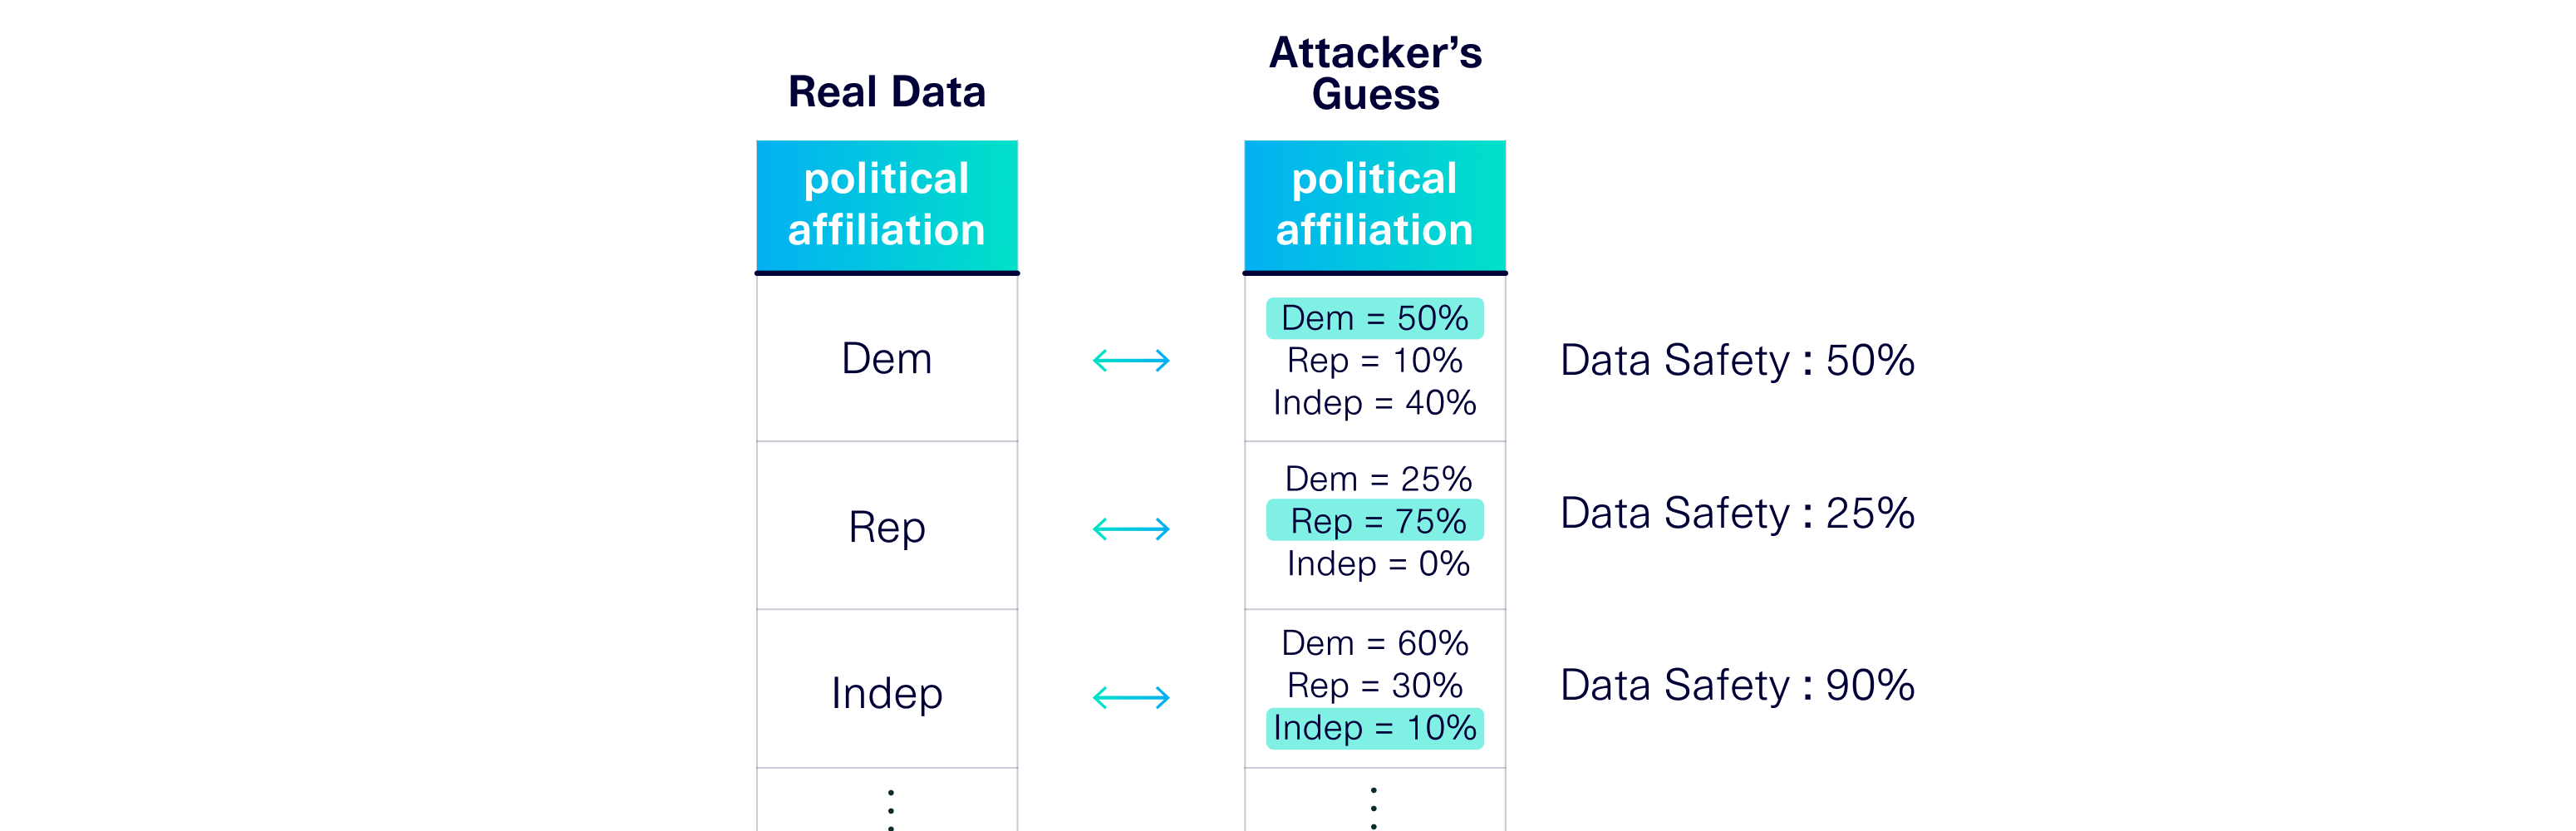

In [49]:
url13 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2F6i7TWjY2aqDDeP8YXjYc%2FCategoricalCAP%20(Score).png?alt=media&token=afe18765-89da-46e2-a534-c5871878c6f8"
res13 = requests.get(url13)
request_get_img13 = Image.open(BytesIO(res13.content))
request_get_img13

key_fields 란 실제자료의 몇개의 열들을 의미하며 , sensitive_fields란 공격자의 목표로서 중요한 정보를 추측하고자 하는 열들을 의미한다.   

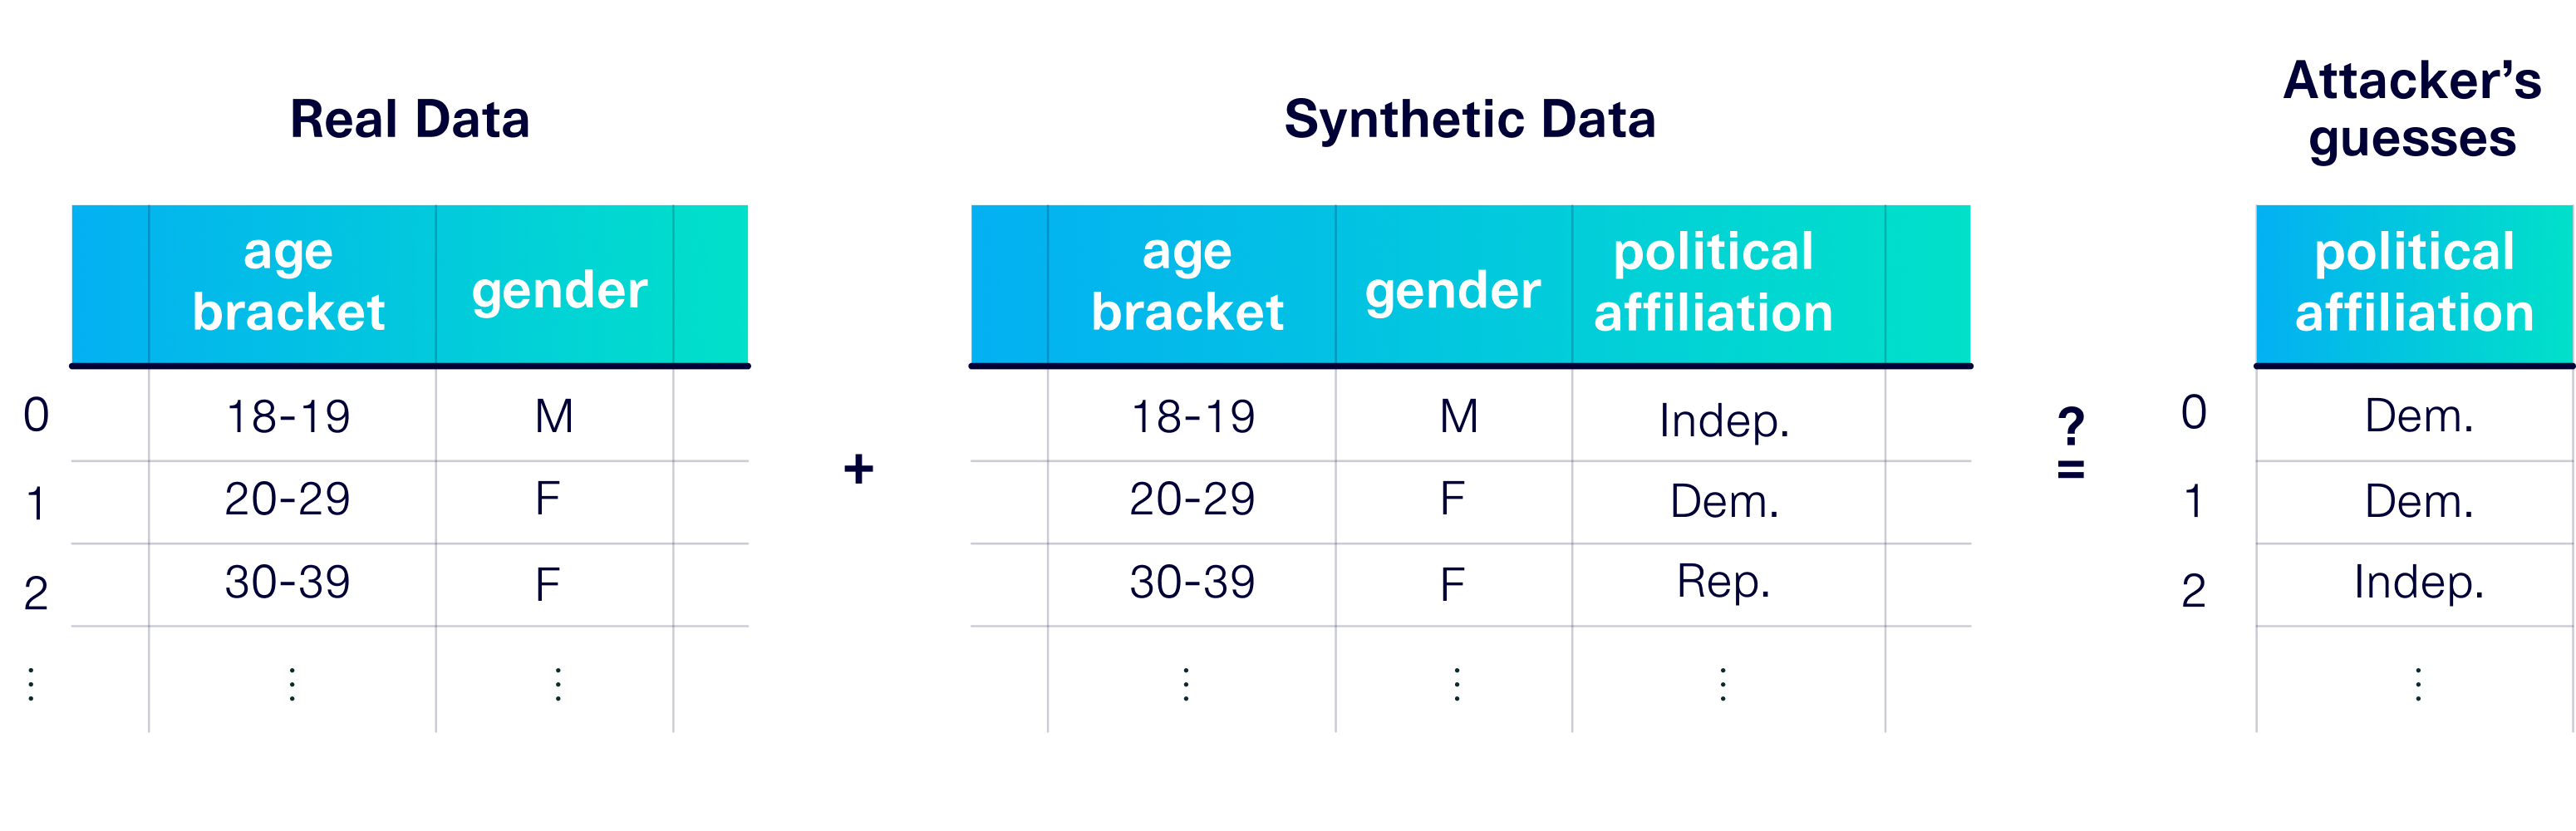

In [50]:
url14 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FnsQ89zS1V6ZGoKu7QKmy%2FCategorical%20CAP%20(Description).png?alt=media&token=5d2d4cef-c98f-46f1-898a-44c6ac9119c7"
res14 = requests.get(url14)
request_get_img14 = Image.open(BytesIO(res14.content))
request_get_img14

key_fields는 age bracket과 gender이며 , sensitive_fields는 재현자료에서 political affilitation을 의미한다.

이제 CAP알고리즘이 뭔지에 대해서 알아보자. 



CAP algorithm 공격자는 4단계에 따라 중요한 값을 추측한다. 
1. 실제자료의 집합에서 행을 선택하고 r에 있는 모든 key_fields를 적어둔다. 
2. 재현자료에서 r의 key_fileds와 일치하는 모든 행을 찾는다. 이 행의 잡합을 S라고 했을 때 집합 S는 r의 equivalence class 라고 한다. 
3. S의 각 행에는 sensitive_fields에 대한 합성 값이 있다. 각 값이 실제 행 r의 sensitive_fields를 추측하기 위해 투표하도록 한다. 
4. 최종 점수는 모든 sensitive_fields에 대해 실제로 정확한 투표 빈도이며 이 값은 0에서 1사이이다. 

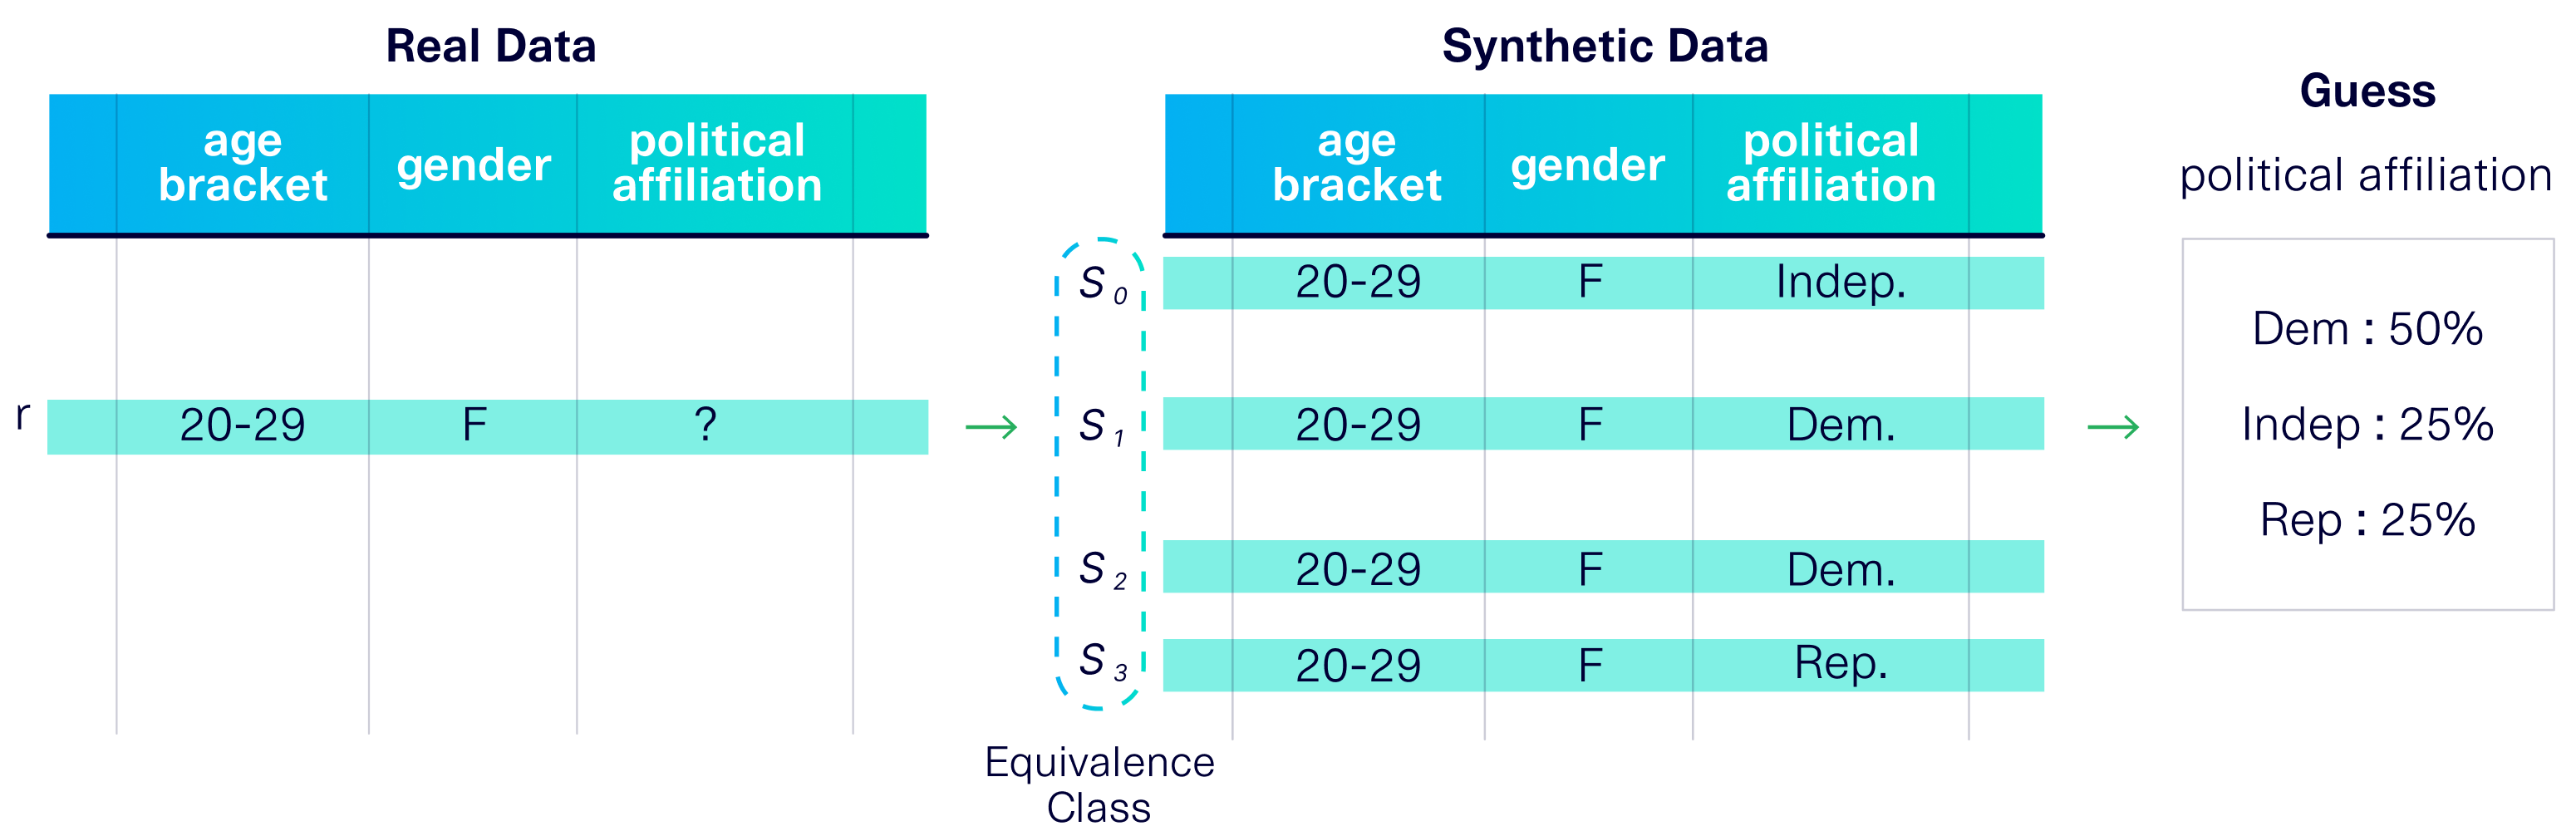

In [51]:
url15 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FAKbzwr6pALH1K5FiQpnA%2FCategoricalCAP%20(Algorithm).png?alt=media&token=0cf2a5d3-7e6c-4e0e-a973-8292592e0459"
res15 = requests.get(url15)
request_get_img15 = Image.open(BytesIO(res15.content))
request_get_img15

실제자료의 모든 행(r)에 대해서 공격을 반복하고 sensitive column을 정확하게 추측할 수 있는 전체 확률을 계산한다.   
메트릭은 1-확률을 반환하므로 점수가 높을수록 개인 정보 보호 수준이 높아진다.   



Variants of CAP SDMetrics 라이브러리는 공격자가 equivalence class로 수행할 수 있는 작업을 기반으로 변형 CAP 알고리즘을 지원한다.



○ CategoricalZeroCAP : equivalence class에 행이 없으면 공격자는 해당 행을 추측하기 위해 실패(0)을 기록한다. 

○ CategoricalGeneralizedCAP : equivalence class에 행이 없을 경우 공격자는 정확한 일치 항목 대신 가장 가까운 일치 항목을 찾는다. 

key_fields는 모두 이산형이므로 공격자는 hamming distance를 이용해서 가장 가까운 일치 항목을 찾는다.

이를 통해 equivalence class에 항상 하나 이상의 행이 존재하며 이는 항상 하나이상의 추측이 존재함을 의미한다. 

In [ ]:
from sdmetrics.single_table import CategoricalCAP

score = CategoricalCAP.compute(
    real_data=real_table,
    synthetic_data=synthetic_table,
    key_fields=['age_bracket', 'gender'],
    sensitive_fields=['political_affiliation']
)

파라미터 : 

- real_data : 실제자료의 이름 

- synthetic_data : 재현자료의 이름 

- key_fields : 공격자가 이미 알고있는 Column 이름을 나타내는 문자열 목록 

- sensitive_fields : 공격자가 추측하려는 Column 이름을 나타내는 문자열 목록 

## 11. CategoricalCoverage

이 메트릭은 재현자료의 열이 실제 데이터의 열에 있는 가능한 모든 범주를 포함하는지 여부를 측정한다. 



1. Categorical : 범주형 자료 형태의 열 

2. Boolean : True , False 형태의 열 



※ 결측값은 무시함. 



범위는 0에서 1로 표현할 수 있으며, 1에 가까워 질수록 재현자료의 열에는 실제자료의 열에 있는 모든 고유 범주가 포함됨을 의미한다. 

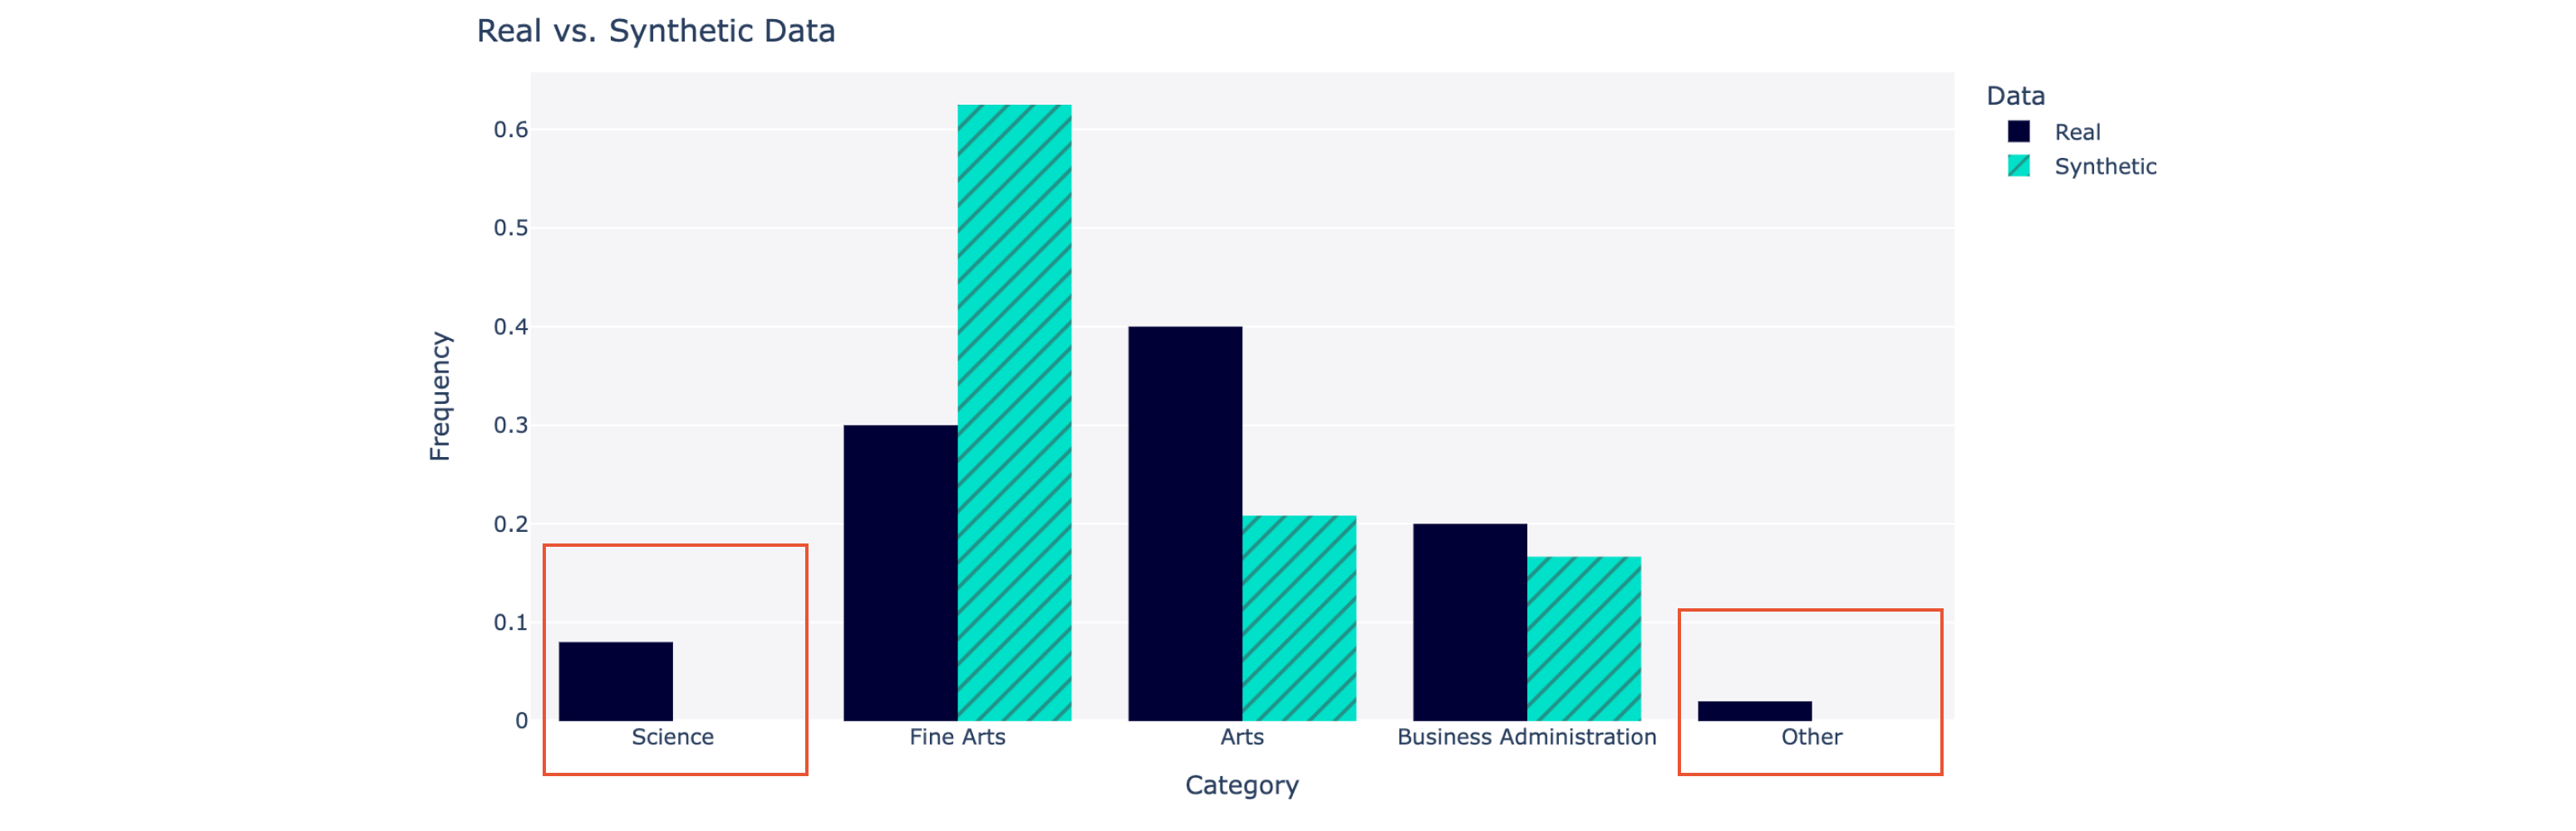

In [52]:
url16 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2F2yn1OQLODOesNLVjnpe2%2FCategory%20Coverage.png?alt=media&token=e12f6f08-d3b0-4e05-9a41-58b8a28d4a4e"
res16 = requests.get(url16)
request_get_img16 = Image.open(BytesIO(res16.content))
request_get_img16

실제 데이터가 5개의 고유한 범주를 가지고 있었다면, 합성자료는 3개의 범주밖에 표현하지 못한다는 것을 확인 할 수 있다. 따라서 값은 3/5이다.

이 메트릭은 먼저 실제자료의 열(r)에 존재하는 고유 범주 c의 수를 계산하고, 재현자료에 있는 범주의 수(s)를 계산한다 그런 다음 재현자료에 포함된 실제 데이터 범주의 비율을 반환한다. 

$$ score = \frac{c_{s}}{c_{r}}$$

이 메트릭은 single_column 모듈에서 compute 방법을 써야한다. 

In [ ]:
from sdmetrics.single_column import CategoryCoverage

CategoryCoverage.compute(
    real_data=real_table['column_name'],
    synthetic_data=synthetic_table['column_name']
)

파라미터 : 

- real_data : 실제자료에서의 하나의 Column

- synthetic_data : 재현자료에서의 하나의 Column

## 12. MissingValueSimilarity

이 메트릭은 재현자료에서의 결측값 비율이 실제 데이터의 지정된 열과 동일한지의 여부를 비교한다. 



범위는 0에서 1로 표현할 수 있으며, 1에 가까워 질수록 결측값 비율이 동일하다는 것을 의미한다. 

이 메트릭은 실제데이터와 재현자료 R ,S 모두 결측값 p의 비율을 계산한다. 정규화 후 [0,1] 범위의 유사도 점수를 반환하며, 1은 가장 높은 유사도를 나타낸다. 

$$ score = 1 - |S_{p} - R_{p}| $$

오른쪽 항은 실제 데이터와 합성 데이터 사이의 결측값 / 비결측값의 TVD와 같다.

In [ ]:
from sdmetrics.single_column import MissingValueSimilarity

MissingValueSimilarity.compute(
    real_data=real_table['column_name'],
    synthetic_data=synthetic_table['column_name']
)

파라미터 : 

- real_data : 실제자료에서의 하나의 Column

- synthetic_data : 재현자료에서의 하나의 Column

## 13. NewRowSynthesis

이 메트릭은 재현자료의 각 행이 새 행인지 또는 실제자료의 원래 행과 정확히 일치하는지 여부를 측정한다. 



1. Categorical : 범주형 자료 형태의 열 

2. Boolean : True , False 형태의 열 

3. Numerical : 이 메트릭은 연속적인 수치 데이터를 의미한다. 

4. Datetime : 이 메트릭은 날짜 시간의 값을 의미한다. 



※ 이 메트릭은 결측값에서 일치하는 항목을 찾는다. 실제 데이터에 있을수 있는 다른 열은 무시한다. 



범위는 0에서 1이며 1로 가면 갈수록 실제 데이터와 일치 항목이 없다는 것을 의미한다. 

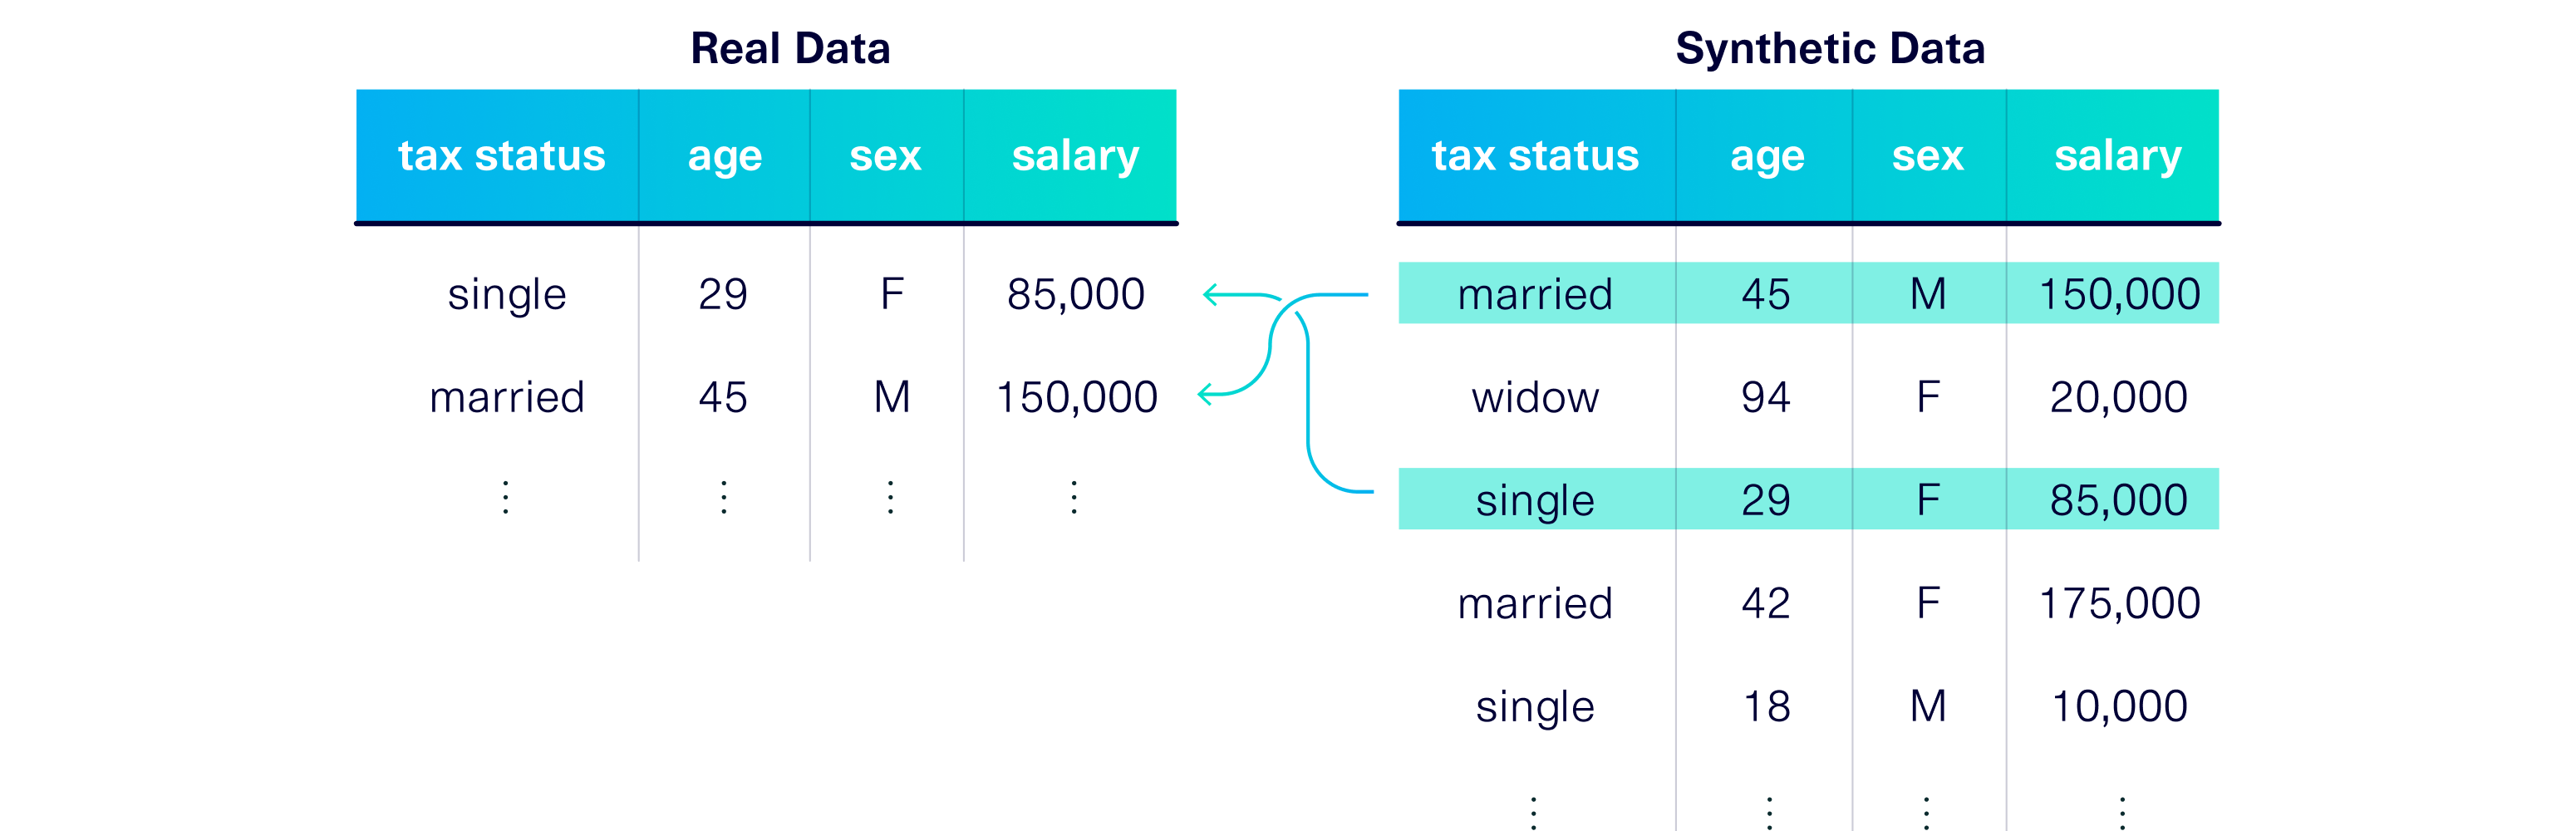

In [53]:
url17 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FvFceNLYids2B6x4b4o7y%2FSynthetic%20Uniqueness.png?alt=media&token=8a75ca24-98f8-4d9f-8347-268e4eefedee"
res17 = requests.get(url17)
request_get_img17 = Image.open(BytesIO(res17.content))
request_get_img17

5개중에서 2개의 행이 일치하기 때문에 값은 60%로 나온다.

이 메트릭은 실제자료의 세트와 재현자료의 세트간에 일치하는 행을 찾는다.  
일치로 간주하려면 실제자료의 Column의 모든 개별 값이 재현자료의 Column과 일치해야한다.   
정확한 일치 기준은 데이터 유형을 기준으로 한다.   



○ Categorical/Boolean Data : 실제자료의 값은 재현자료의 값과 정확히 같아야 한다. 

○ Numerical/Datetime Data : 실제자료와 재현자료의 모든 값(x)를 확장한다. 여기서 r은 실제자료에서의 모든 값을 나타낸다. 

$$scaled(x) = \frac{x - min(r)}{max(r) - min(r)}$$

결측값 : 일치로 간주하려면 실제자료에서의 값과 재현자료의 값이 모두 누락되어야 한다. 



마지막으로, 재현자료와 실제자료의 행과 일치하는 행의 비율을 계산한다. 점수는 1이 좋은점수(모든 행이 고유함)이고 0이 나쁜점수(모든 행이 일치함)이다. 

이 메트릭은 single_column 모듈에서 compute 방법을 써야한다

In [ ]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=real_table,
    synthetic_data=synthetic_table,
    metadata=single_table_metadata_dict,
    numerical_match_tolerance=0.01,
    synthetic_sample_size=10_000
)

파라미터 : 

- real_data : 실제자료에서의 하나의 Column

- synthetic_data : 재현자료에서의 하나의 Column

- metadata : single_table metadata 

- numerical_match_tolerance : 일치로 간주되기 위해 두 숫자 값이 얼마나 가까워아하는지 나타내는 값 (>0)

   - (default) 0.01 : 1%를 의미한다.

- synthetic_sample_size : 이 메트릭을 계산하기 전에 샘플링 할 재현자료 행의 갯수, 재현자료의 양이 많은 경우 계산 시간을 단축 할 수 있다. 표본의 크기가 낮으면 최종 점수가 정확하지 않을 수 있다. 

   - (default) None : 표본을 추출하지 않고 모든 재현자료를 사용한다. 

## 14. RangeCoverage

이 메트릭은 재현자료의 열이 실제 데이터의 열에 있는 모든 범위의 값을 포함하는지 여부를 측정한다. 



1. Numerical : 이 메트릭은 연속적인 수치 데이터를 의미한다. 

2. Datetime : 이 메트릭은 날짜 시간의 값을 의미한다. 



 점수가 1이 되면 재현자료의 열은 실제 데이터의 열에 있는 모든 값의 범위를 포함하고 있다고 간주하고 0으로 가까워질수록 실제 데이터의 열과 많이 일치하지 않는다는 것을 의미한다.

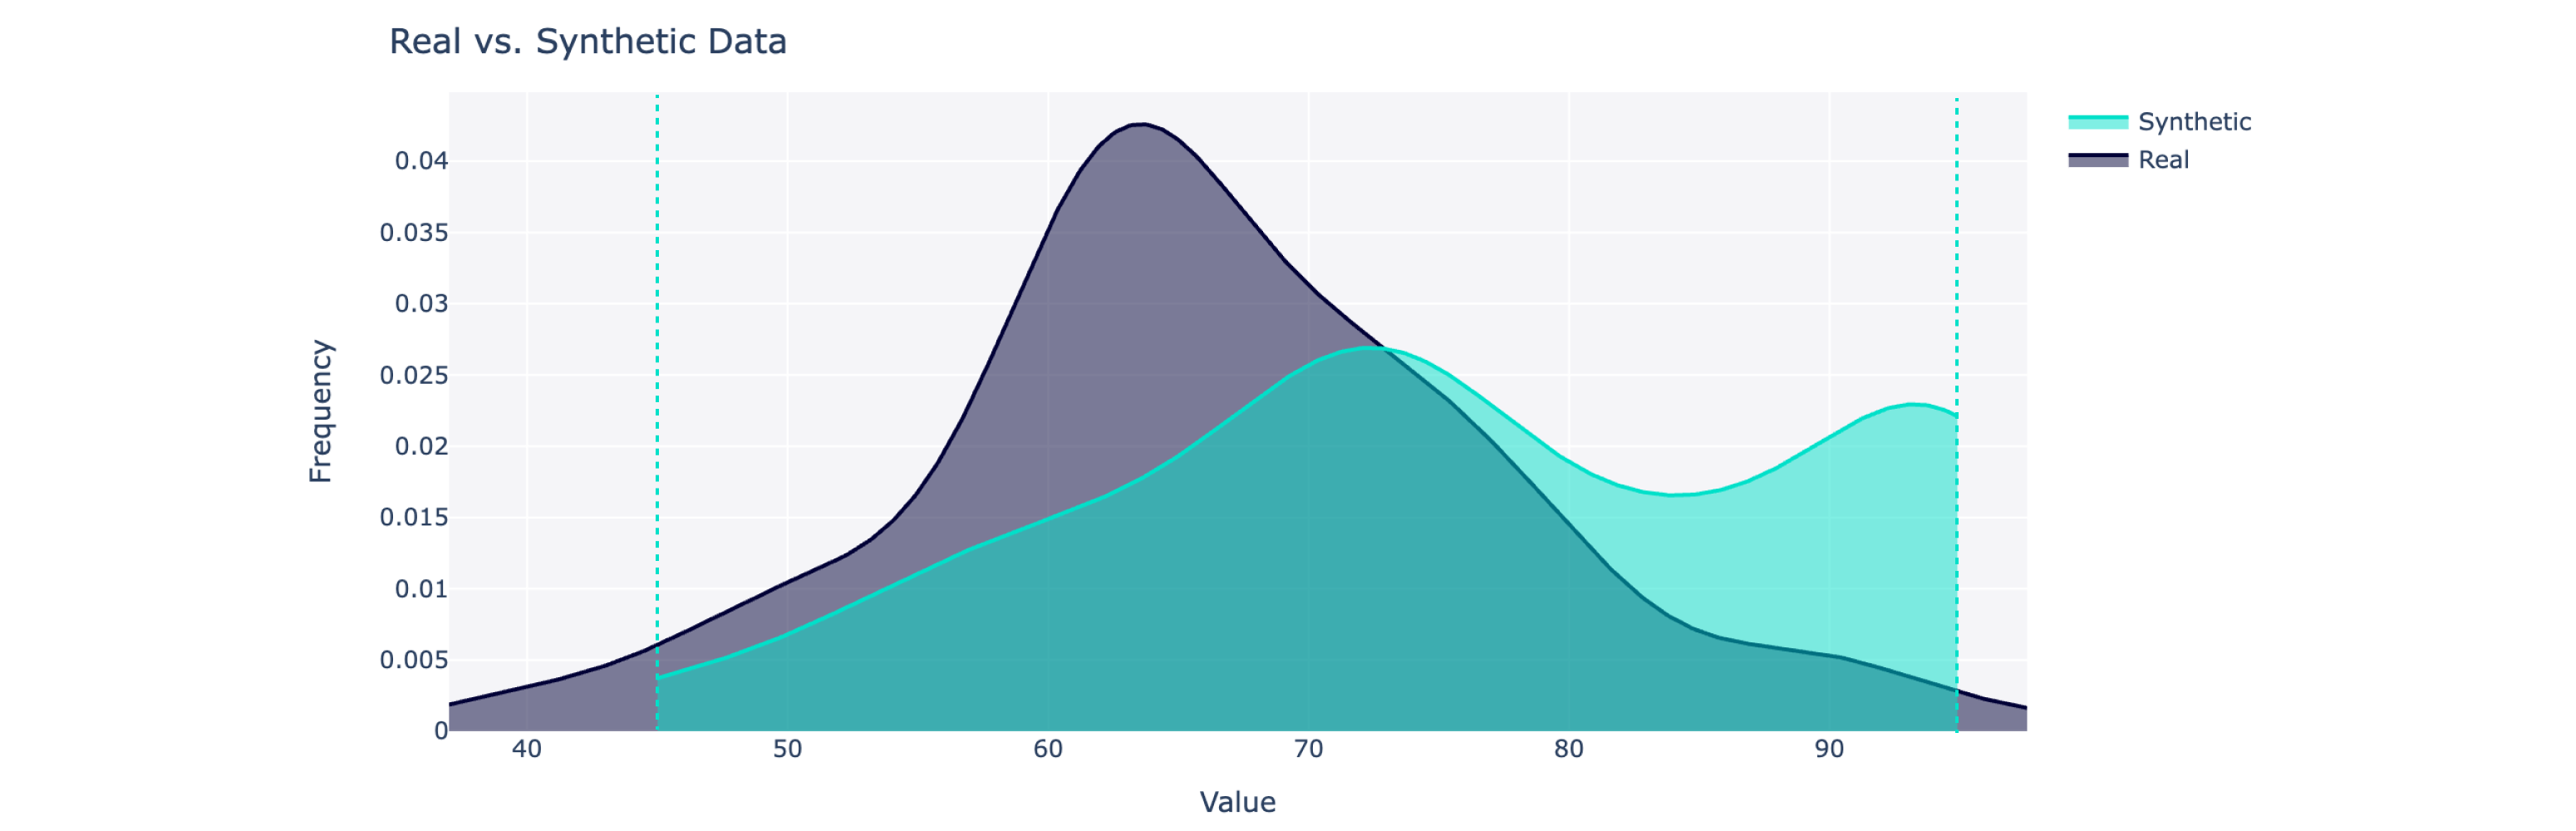

In [54]:
url18 = "https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FUa21ikMRPxduAFIpovjM%2FRange%20Coverage.png?alt=media&token=bb7dca22-ad7d-4521-8523-e683588deb2b"
res18 = requests.get(url18)
request_get_img18 = Image.open(BytesIO(res18.content))
request_get_img18


실제 데이터는 [37.0, 97.7] 범위에 있는 반면 합성 데이터는 [45, 95] 범위에 있다. 합성 데이터는 실제 값 [37, 45] 및 [95, 97.7]의 하한과 상한을 포함하지 않는다. 누락된 범위는 전체 범위의 약 18%를 차지하여 RangeCoverage가 0.82이다.


r과 s가 실제자료의 열과 재현자료의 열을 나타내는 경우, 이 메트릭은 공식에 따라 s의 최소값과 최대값이 r의 실제 데이터의 최소값과 최대값에 얼마나 가까운지 계산한다.

재현자료의 범위가 매우 낮으면 방정식이 음수가 될 수 있다 이 경우에는 가장 낮은 값이므로 점수를 0으로 간주한다. 

재현자료가 범위를 벗어난 경우에는 점수에 불이익이 있지는 않다. 재현자료가 실제자료의 최소값과 최대값을 초과하면 범위가 완전히 포함되고 점수는 1이 된다. 

$$score = 1 - [max(\frac{min(s) - min(r)}{max(r) - min(r)},0) + max(\frac{max(r) - max(s)}{max(r) - min(r)},0]$$

In [ ]:
from sdmetrics.single_column import RangeCoverage

RangeCoverage.compute(
    real_data=real_table['column_name'],
    synthetic_data=synthetic_table['column_name']
)

파라미터 :

- real_data : 실제자료에서의 하나의 Column

- synthetic_data : 재현자료에서의 하나의 Column

## 15. RangeCoverage

이 메트릭은 요약 통계량을 비교하여 실제자료에서의 열과 재현자료간의 유사성을 측정한다. 지원되는 요약통계량으로는 평균 , 중위수 , 표준편차이다. 



1. Numerical : 이 메트릭은 연속적인 수치 데이터를 의미한다. 

2. Datetime : 이 메트릭은 날짜 시간의 값을 의미한다. 



※ 결측값은 무시함. 



0에서 1사이의 범위를 가지며 1로 가까워질수록 재현자료가 실제 자료와 유사하다는 것을 의미한다. 

실제 자료와 재현자료에 대해 주어진 통계함수 f와 그에 맞는 r 및 s를 계산한다. 그런다음 검정에서 배율을 조정하고 점수를 정규화한다.   
이렇게하면 [0,1] 범위에 해당하는 점수가 생성되고 값이 높으면 유사성이 높다는 것을 의미한다. 
  
통계함수 (f) 에는 (산술)평균 , 중위수 , 표준편차가 들어간다. 

$$score = 1 - \frac{|f(r) - f(s)|}{max(r) - min(r)}$$

In [ ]:
from sdmetrics.single_column import StatisticSimilarity

StatisticSimilarity.compute(
    real_data=real_table['column_name'],
    synthetic_data=synthetic_table['column_name']
    statistic='mean'
)

파라미터 :

- real_data : 실제자료에서의 하나의 Column

- synthetic_data : 재현자료에서의 하나의 Column

- statistic : 'mean' , 'median' , 'std'

## 16. CSTest

이 메트릭은 열 모양 측면에서 실제자료와 재현자료의 유사성을 계산한다. 모양은 열의 막대 그래프를 그릴 때 관찰한 것과 같다고 생각할 수 있다.



1. Categorical : 범주형 자료 형태의 열 

2. Boolean : True , False 형태의 열 



0에서 1사이의 범위를 가지며 만약에 p-value 값이 높다면 1에 가까워지고 재현자료가 실제자료와 많이 차이가 나지 않는다는 것을 의미한다. 

범주 빈도를 계산하기 위해 실제자료 및 재현자료를 정규화하고, 카이제곱 검정을 사용하여 재현자료가 실제 자료와 동일한 분포를 따른다는 귀무 가설을 검정한다.   
실시한 검정으로부터 p-value값을 반환하고 여기서 p-value값이 작을수록 재현자료가 실제자료와 유의하게 다르므로 귀무가설을 기각하고 전체 점수가 더 나빠진다. 

In [ ]:
from sdmetrics.single_column import CSTest

CSTest.compute(
    real_data=real_column,
    synthetic_data=synthetic_column
)

파라미터 :

- real_data : 실제자료에서의 하나의 Column

- synthetic_data : 재현자료에서의 하나의 Column

참고사이트 :  https://docs.sdv.dev/sdv﻿